Zadaniem tego projektu jest budowanie modelu regresji na przykładzie danych zawierających ceny nieruchomości znajdujących się w pliku "domy.csv". Do wykonania projektu można korzystać jedynie z podstawowych biliotek.

In [1]:
# Wyczanie pakietów podstawowych
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import re

In [3]:
# Wczytanie danych
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
domy = pd.read_csv("domy.csv", sep=',', dtype=dtype_dict)
domy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007.0
21611,0291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


### Podział danych zostanie dokonany zależnie od numeru indeksu

In [4]:
# !!!Jako random_state podaj swój numer indeksu!!!
numer_indeksu = 324244
try:
    ceny = domy['price']
    domy.drop('price', axis=1, inplace=True)
except KeyError:
    pass
domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)
postawowe_cechy = domy.columns.values
postawowe_cechy

array(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

## Zadanie 1
Dokonaj analizy posiadanych zmiennych. Zakresy zmienności, korelacje, skośność. Dane nieużyteczne jak np. id można pominąć.

## pierwsze rozglądanie się po danych

In [5]:
domy.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3.0,1.00,1180.0,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,3.0,2.25,2570.0,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,2.0,1.00,770.0,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,4.0,3.00,1960.0,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,3.0,2.00,1680.0,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [6]:
domy.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
domy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  object 
 1   date           21613 non-null  object 
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  float64
 5   sqft_lot       21613 non-null  int32  
 6   floors         21613 non-null  object 
 7   waterfront     21613 non-null  int32  
 8   view           21613 non-null  int32  
 9   condition      21613 non-null  int32  
 10  grade          21613 non-null  int32  
 11  sqft_above     21613 non-null  int32  
 12  sqft_basement  21613 non-null  int32  
 13  yr_built       21613 non-null  int32  
 14  yr_renovated   21613 non-null  int32  
 15  zipcode        21613 non-null  object 
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## dane domy zawierają:
* 19 kolumn/cech
* próbe o wielkości 21613 jednostek
* nie posiadają wartości pustych
* typy danych to 16 numerycznych (float i int) oraz 3 tekstowe (string)
* dane ilościowe
* * ciągłe to sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15, lat, long
* * dyskretne to date, yr_built, bedrooms, bathrooms, floors 
* dane jakościowe to waterfront, view, condition, grade, yr_renovated, zipcode 

## korelacje

Miara korelacji pozwala na stwierdzenie stopnia zależności liniowej między danymi.

domy to DataFrame, użycie pandas-owej funkcji corr() oblicza miarę korelacji Pearsona

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:>

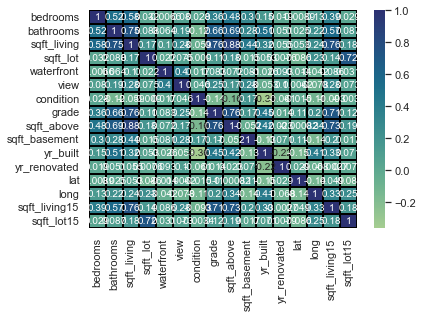

In [9]:
sns.heatmap(domy.corr(),annot = domy.corr(), cmap="crest", linewidths=2, linecolor='black')

## zakres zmienności oraz skośność 

In [10]:
domy_std = domy.std()
domy_mean = domy.mean()
domy_mode = domy.mode()
domy_median = domy.median()

C:\Users\krukd\AppData\Local\Temp/ipykernel_26584/944254747.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  domy_std = domy.std()
C:\Users\krukd\AppData\Local\Temp/ipykernel_26584/944254747.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  domy_mean = domy.mean()
C:\Users\krukd\AppData\Local\Temp/ipykernel_26584/944254747.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  domy_median = domy.median()


    dominanta - moda dla lat ma 4 wartości 

In [11]:
domy_mode

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0795000620,20140623T000000,3.0,2.5,1300.0,5000.0,1,0.0,0.0,3.0,7.0,1300.0,0.0,2014.0,0.0,98103,47.5322,-122.29,1540.0,5000.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.5491,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.6624,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.6846,NaN,NaN,NaN


In [12]:
domy_mean

id                        inf
bedrooms         3.370842e+00
bathrooms        2.114757e+00
sqft_living      2.079900e+03
sqft_lot         1.510697e+04
waterfront       7.541757e-03
view             2.343034e-01
condition        3.409430e+00
grade            7.656873e+00
sqft_above       1.788391e+03
sqft_basement    2.915090e+02
yr_built         1.971005e+03
yr_renovated     8.440226e+01
zipcode                   inf
lat              4.756005e+01
long            -1.222139e+02
sqft_living15    1.986552e+03
sqft_lot15       1.276846e+04
dtype: float64

In [13]:
domy_std

bedrooms             0.930062
bathrooms            0.770163
sqft_living        918.440897
sqft_lot         41420.511515
waterfront           0.086517
view                 0.766318
condition            0.650743
grade                1.175459
sqft_above         828.090978
sqft_basement      442.575043
yr_built            29.373411
yr_renovated       401.679240
lat                  0.138564
long                 0.140828
sqft_living15      685.391304
sqft_lot15       27304.179631
dtype: float64

In [14]:
V = domy_std / domy_mean
V

bathrooms         0.364185
bedrooms          0.275914
condition         0.190866
grade             0.153517
id                     NaN
lat               0.002913
long             -0.001152
sqft_above        0.463037
sqft_basement     1.518221
sqft_living       0.441579
sqft_living15     0.345015
sqft_lot          2.741815
sqft_lot15        2.138409
view              3.270620
waterfront       11.471756
yr_built          0.014903
yr_renovated      4.759105
zipcode                NaN
dtype: float64

In [15]:
A_m = (3 * (domy_mean - domy_median)) / domy_std
A_m

bathrooms       -0.526808
bedrooms         1.196184
condition        1.887517
floors                NaN
grade            1.676468
id                    NaN
lat             -0.254341
long             0.343047
sqft_above       0.827412
sqft_basement    1.975997
sqft_living      0.554961
sqft_living15    0.641469
sqft_lot         0.542410
sqft_lot15       0.565678
view             0.917257
waterfront       0.261512
yr_built        -0.408008
yr_renovated     0.630371
zipcode               NaN
dtype: float64

    eliminuje wszystko poza int/float, ponieważ chce wykonać numeryczne modyfikacje

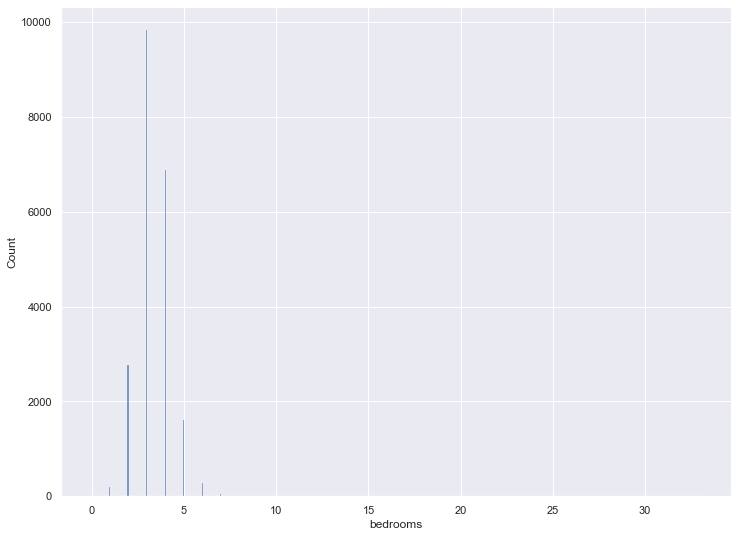

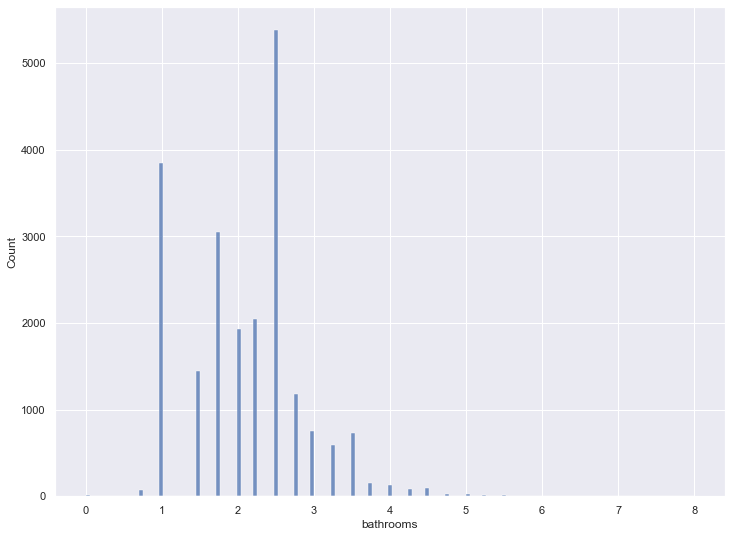

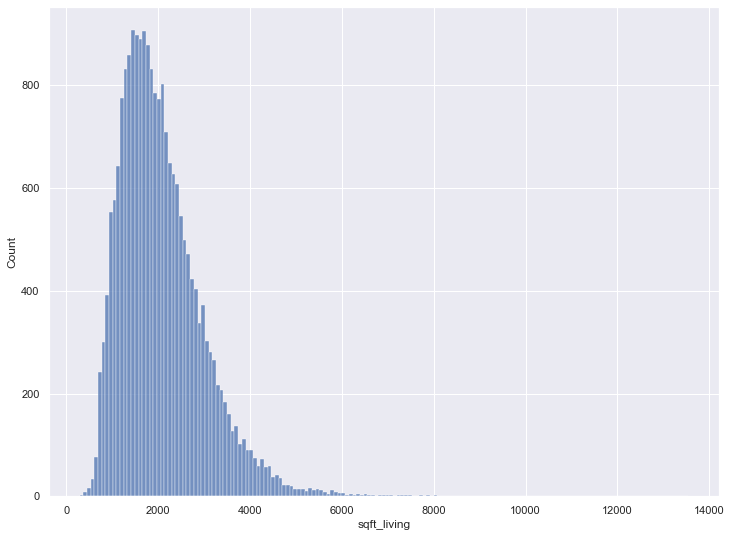

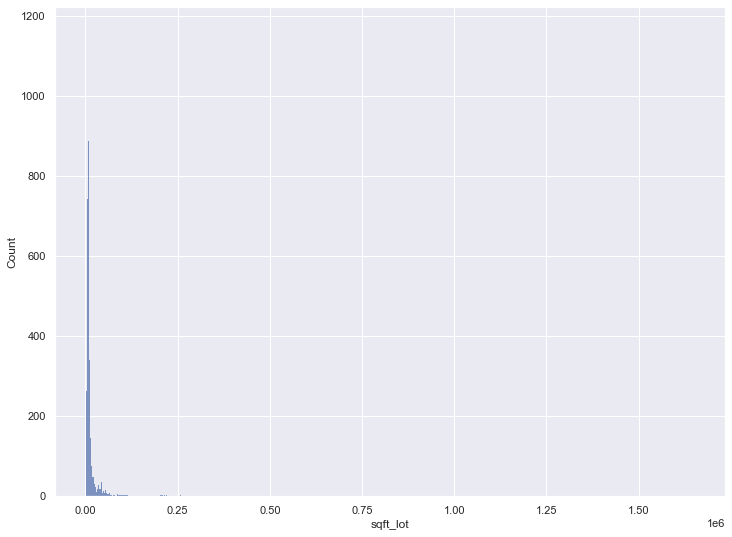

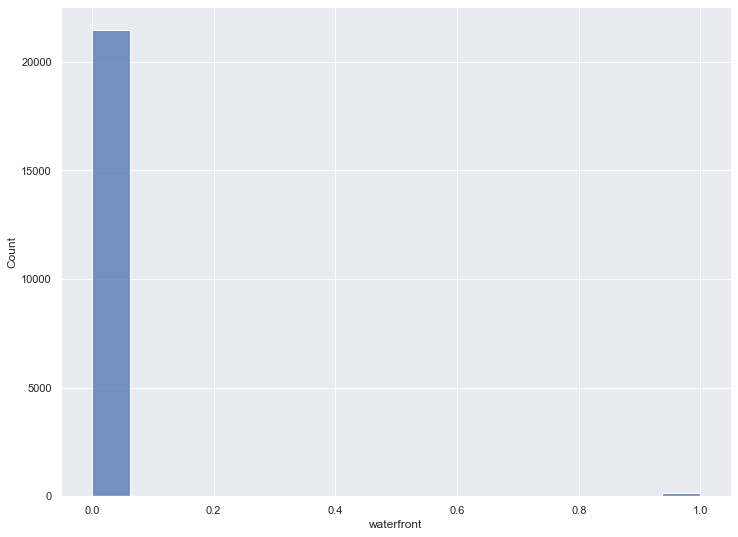

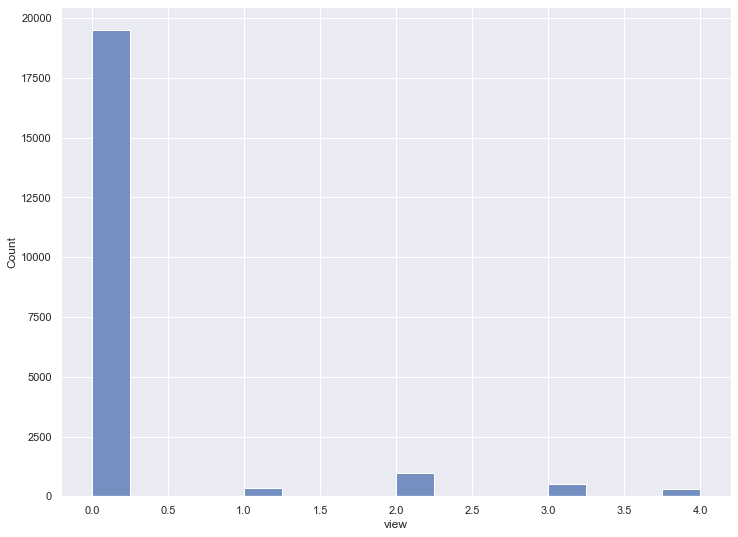

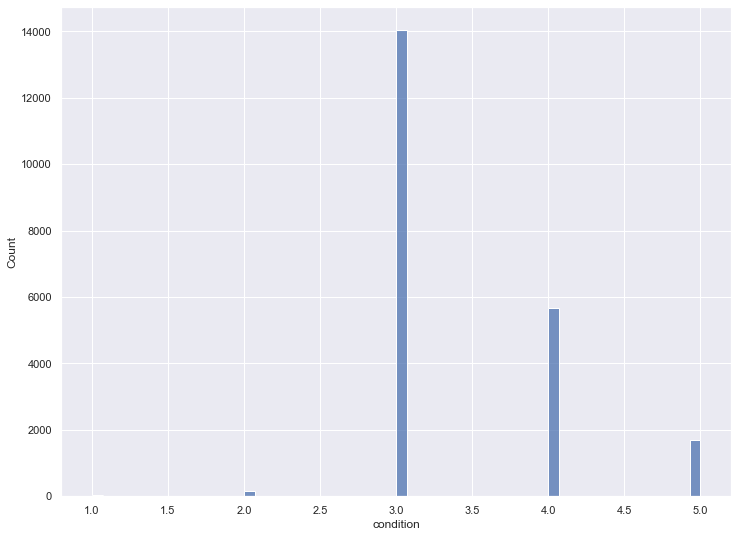

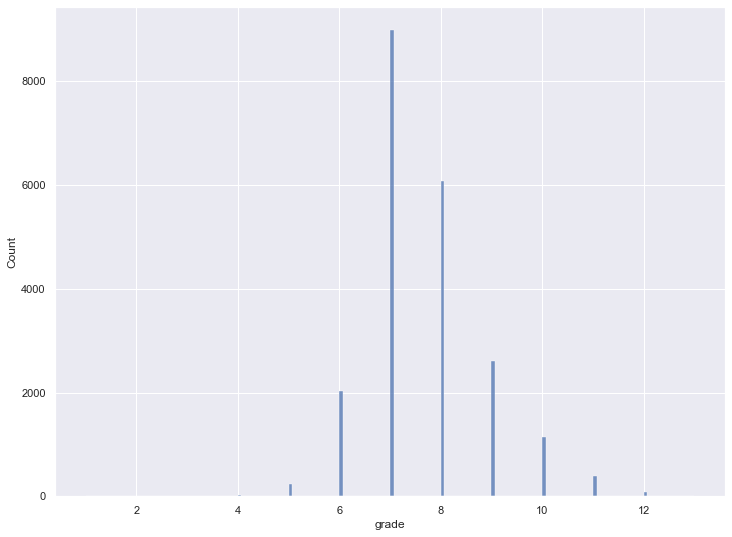

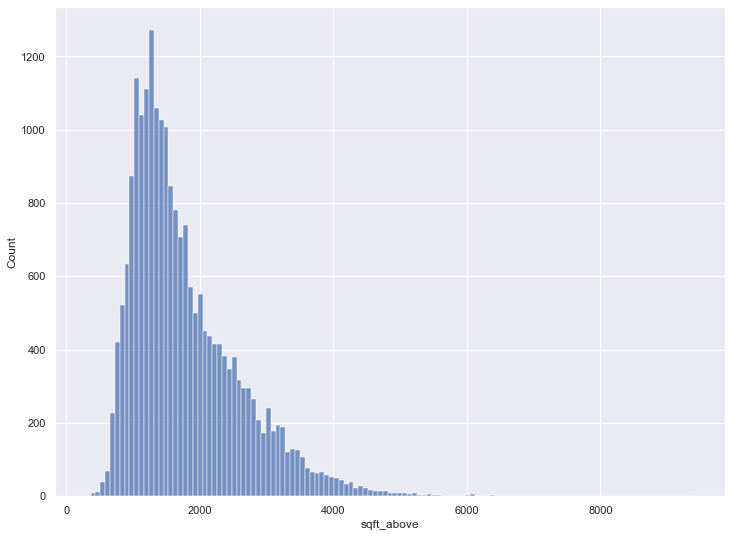

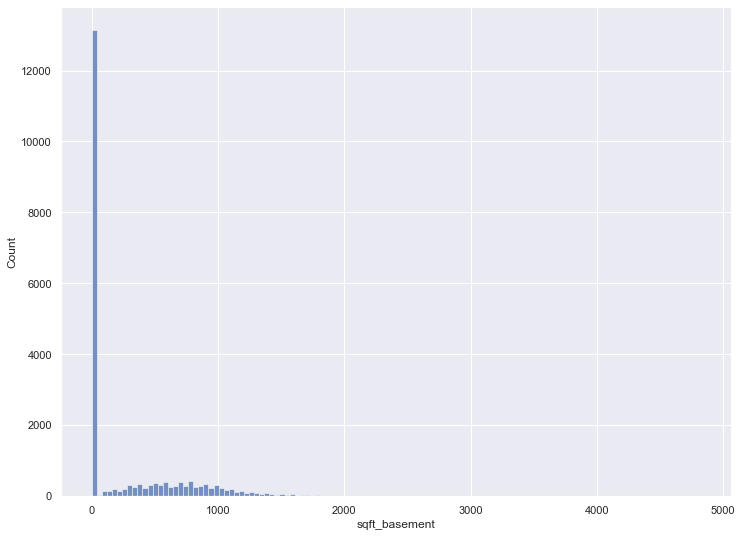

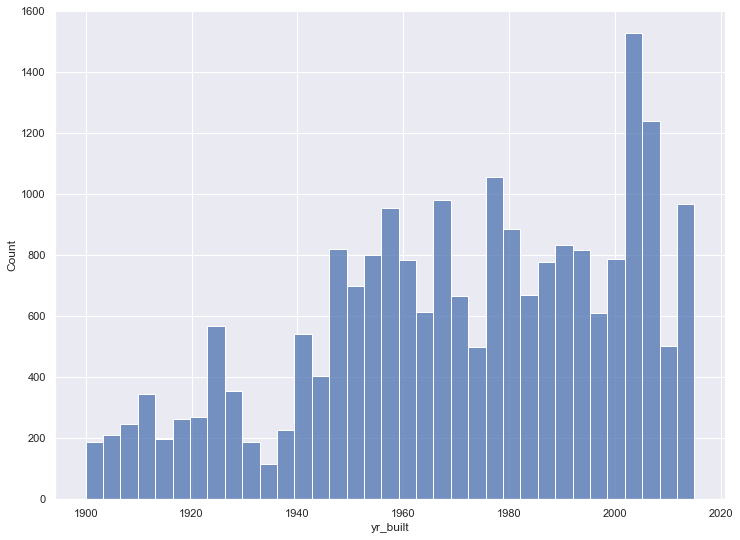

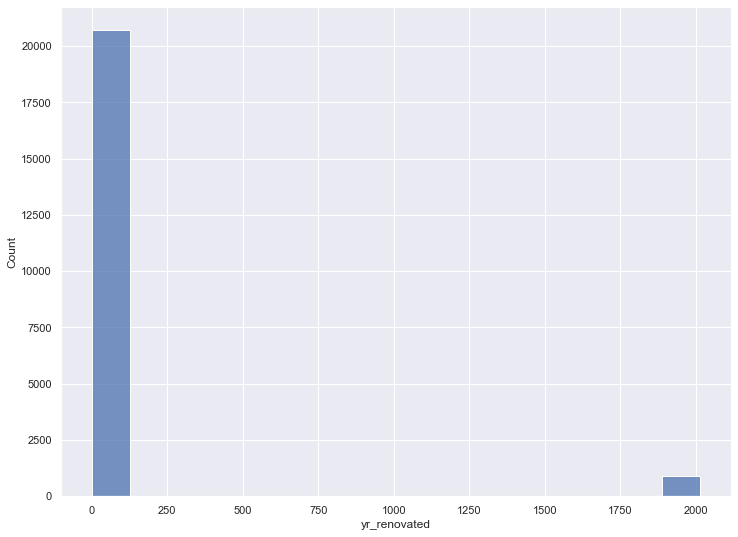

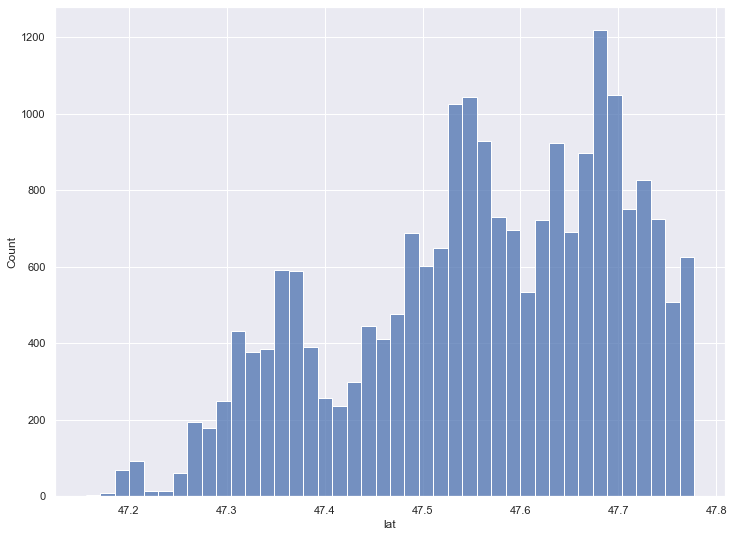

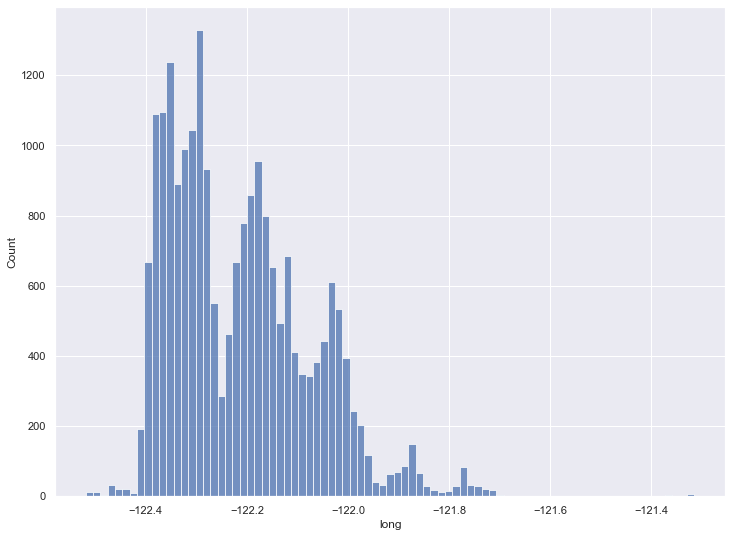

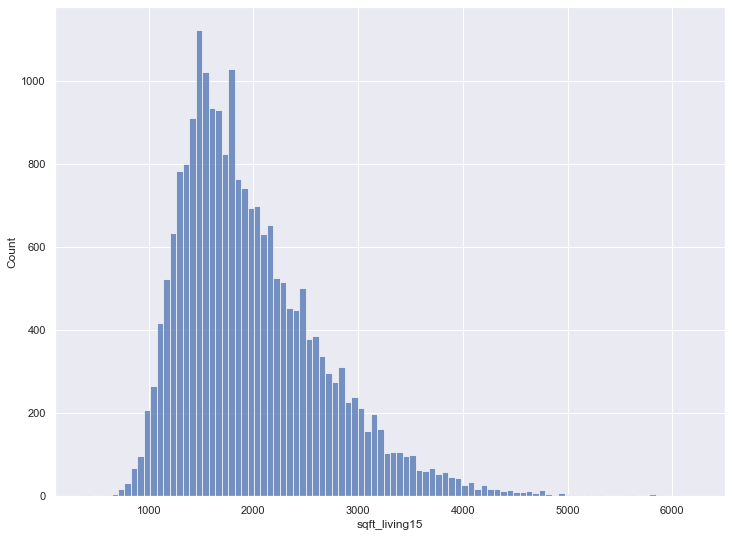

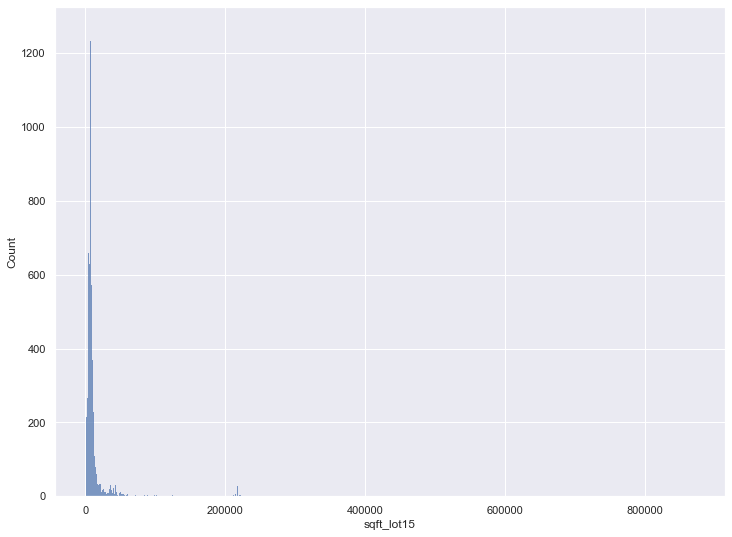

In [16]:
sns.set(rc={'figure.figsize':(12,9)})
col_iter = 0
for col in domy.columns:
    if re.match('^float', str(domy.dtypes[col])) or re.match('^int', str(domy.dtypes[col])):
        sns.histplot(domy[col])
        plt.show()
    col_iter += 1

    Wykres pudełkowy , zwykle używany do obserwacji, różnic pomiędzy kategoriami, tutaj używam go do wizualizacji danych odstających (outliers).Pudełko pokazuje kwartyle zbioru danych, podczas gdy wąsy rozciągają się, aby pokazać resztę rozkładu, z wyjątkiem punktów, które są określone jako odstające za pomocą funkcją zakresu międzykwartylowego IR (Q1, a Q3). W seaborn-owej funkcji bosplot jest zmienne whis, w której można zmienić zakres wąsów, przez Q1/Q3 -/+ x*IR.

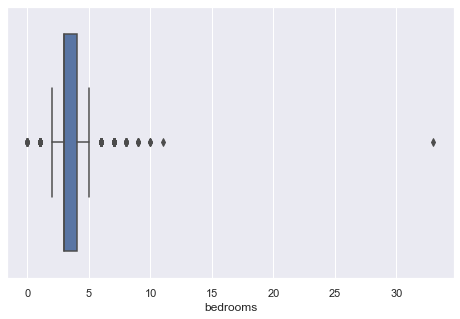

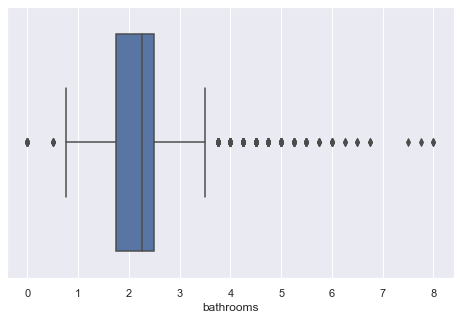

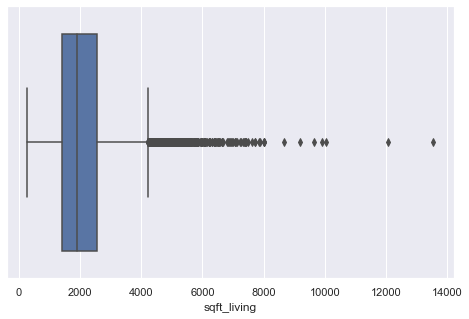

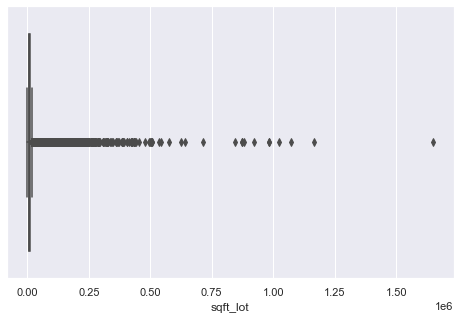

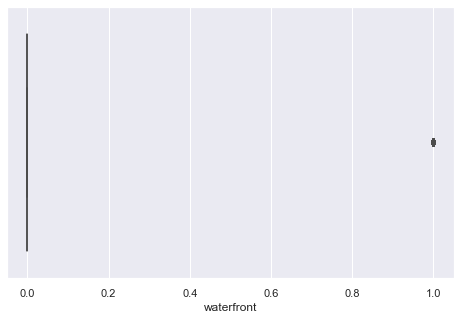

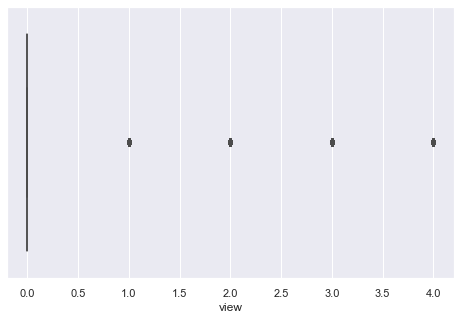

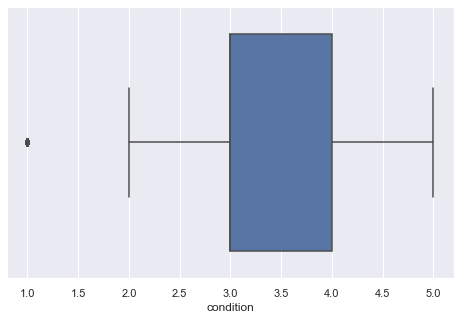

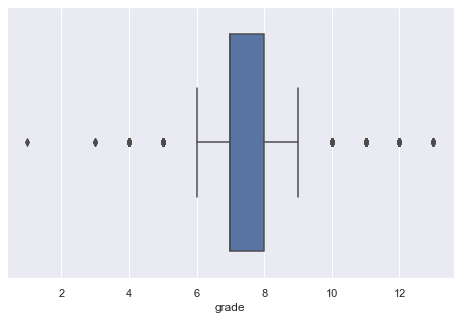

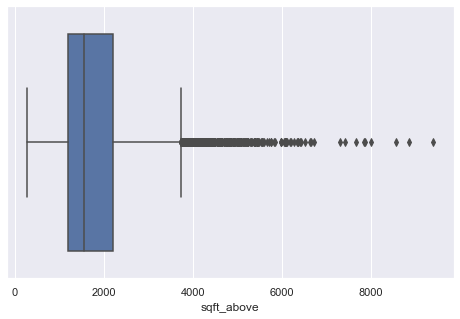

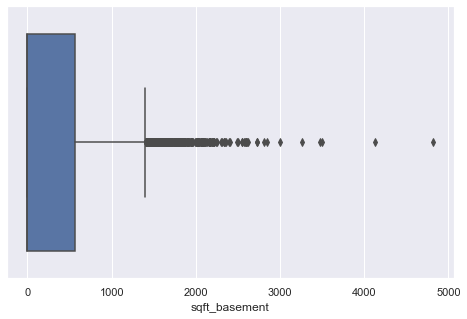

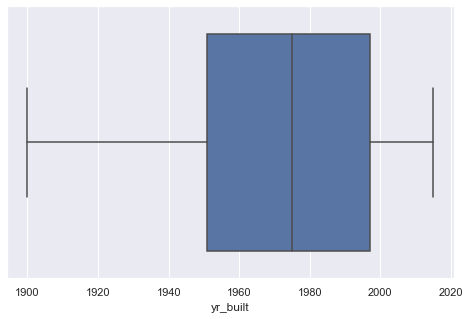

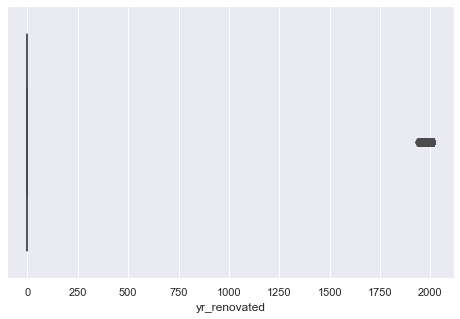

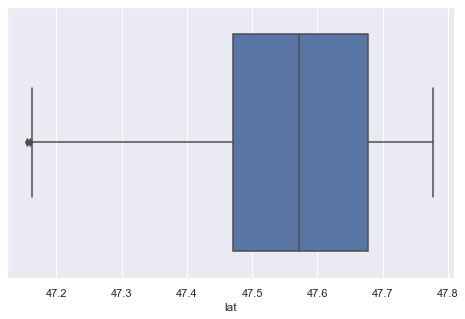

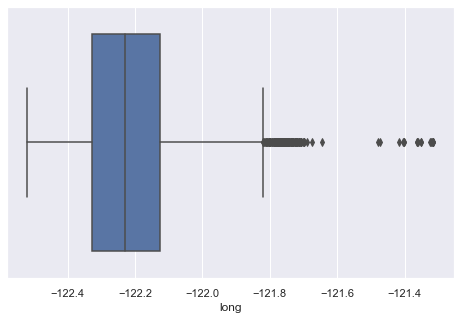

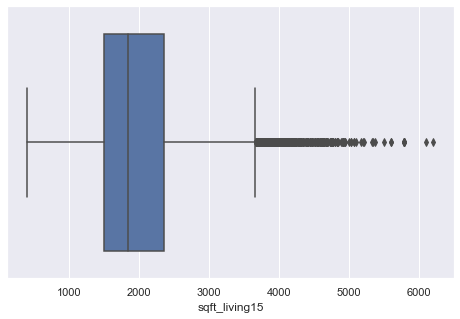

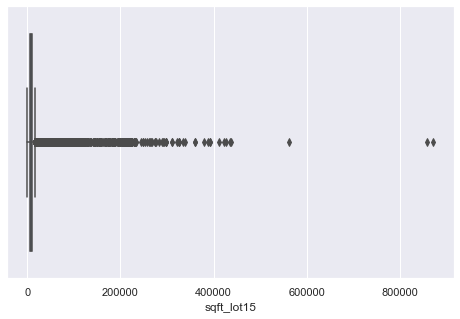

In [17]:
sns.set(rc={'figure.figsize':(8,5)})
for col in domy.columns:
    if re.match('^float', str(domy.dtypes[col])) or re.match('^int', str(domy.dtypes[col])):
        sns.boxplot(x = domy[col], whis =1.5)
        plt.show()

## Zadanie 2
Zaproponuj 5 nowych cech będących wynikiem przeprowadzonych w ramach Zadaniu 1 analiz lub doświadczeń.

    * sqft_lot - logarytmizacja w celu usunięcia usunięcia skośności
    * sqft_living - logarytmizacja w celu usunięcia usunięcia skośności
    * sqft_above - logarytmizacja w celu usunięcia usunięcia skośności
    * dodanie interakcji pomiedzy bedrooms, bathrooms - przez pomnożenie tych wartości
    * dodanie interakcji pomiedzy waterfront, view - przez pomnożenie tych wartości

In [18]:
# domy_0 = domy.copy()

In [19]:
nowe_cech = domy.copy()

In [20]:
domy['sqft_living_LOG'] = np.log(domy['sqft_living'])
try:
    nowe_cech = nowe_cech.drop('sqft_living', axis=1)
except KeyError:
    pass
nowe_cech['sqft_living_LOG'] = domy['sqft_living_LOG']

In [21]:
domy['sqft_lot_LOG'] = np.log(domy['sqft_lot'])
try:
    nowe_cech = nowe_cech.drop('sqft_lot', axis=1)
except KeyError:
    pass
nowe_cech['sqft_lot_LOG'] = domy['sqft_lot_LOG']

In [22]:
domy['sqft_above_LOG'] = np.log(domy['sqft_above'])
try:
    nowe_cech = nowe_cech.drop('sqft_above', axis=1)
except KeyError:
    pass
nowe_cech['sqft_above_LOG'] = domy['sqft_above_LOG']

In [23]:
domy['bed_bath_rooms'] = domy['bedrooms']*domy['bathrooms']
try:
    nowe_cech = nowe_cech.drop('bedrooms', axis=1)
    nowe_cech = nowe_cech.drop('bathrooms', axis=1)
except KeyError:
    pass
nowe_cech['bed_bath_rooms'] = domy['bed_bath_rooms']

In [24]:
domy['waterfront_view'] = domy['waterfront']*domy['view']
try:
    nowe_cech = nowe_cech.drop('waterfront', axis=1)
    nowe_cech = nowe_cech.drop('view', axis=1)
except KeyError:
    pass
nowe_cech['waterfront_view'] = domy['waterfront_view']

## Zadanie 3
Dokonaj wizualiazji nowych cech i określ ich korelację.

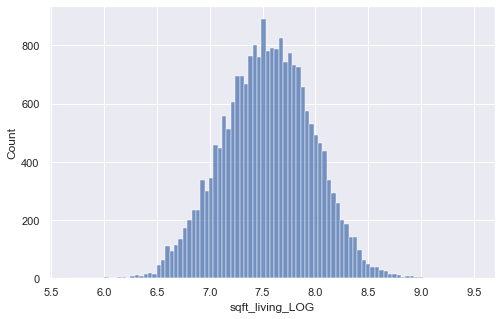

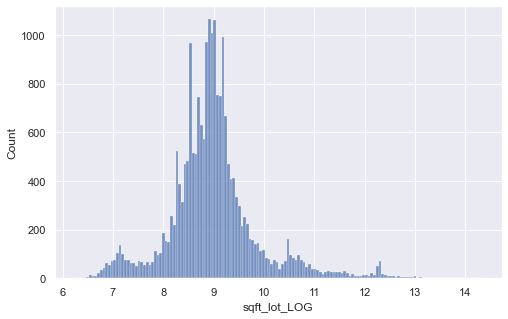

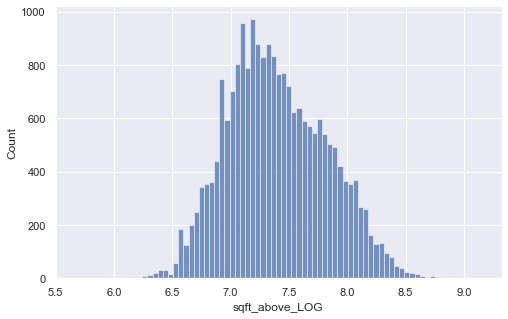

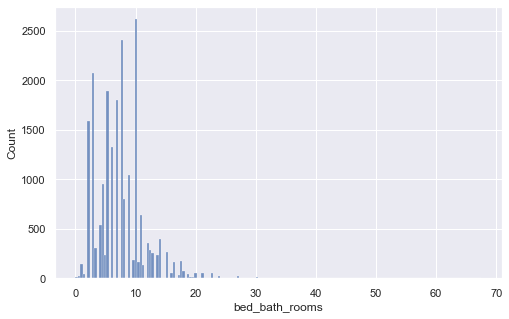

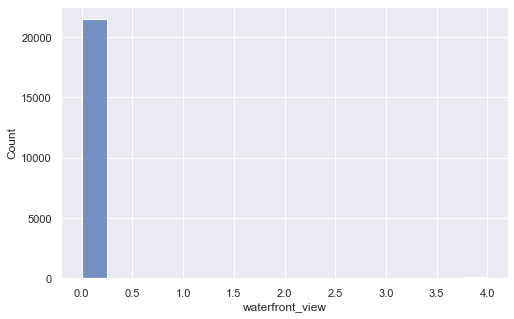

In [25]:
lista_nowy_cech = []
sns.set(rc={'figure.figsize':(8,5)})
for i, col in enumerate(domy.columns):
    if (re.match('^float', str(domy.dtypes[col])) or re.match('^int', str(domy.dtypes[col]))) and i >= col_iter:
        sns.histplot(domy[col])
        plt.show()
        lista_nowy_cech.append(col)

<AxesSubplot:>

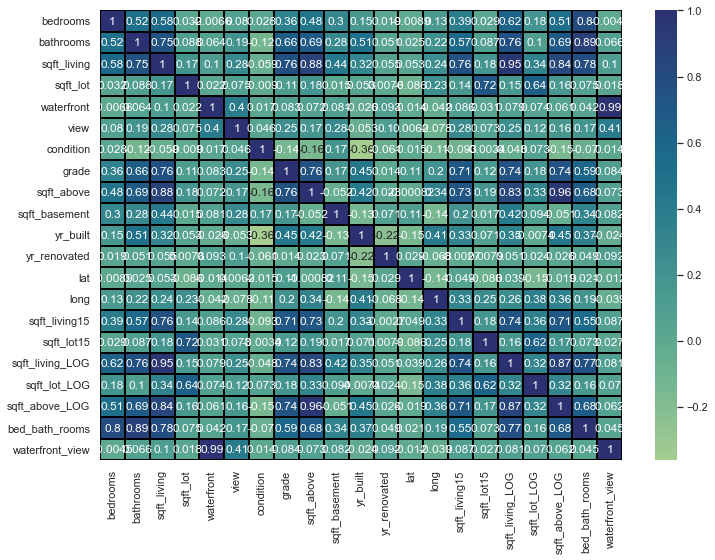

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(domy.corr(),annot = domy.corr(), cmap="crest", linewidths=2, linecolor='black')

<AxesSubplot:>

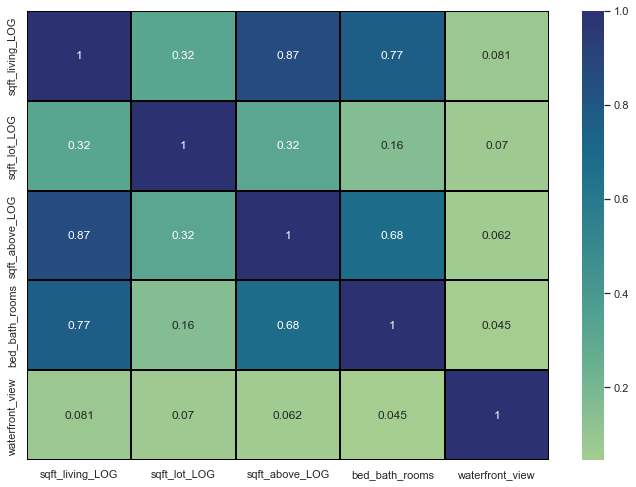

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(domy[lista_nowy_cech].corr(),annot = domy[lista_nowy_cech].corr(), cmap="crest", linewidths=2, linecolor='black')

## Zadanie 4

Wyznacz liniową zależność między 3 najbardziej skorelowanymi ze zmienną opisywaną zmiennymi opisującymi (wszystkie podane cechy + 5 nowo utworzonych). Do wyznaczenia liniowej zależności między cechami, a zmienną opisywaną wykorzystaj pseudoinwersję.

In [28]:
to_price_corr = domy.copy()
to_price_corr['price'] = ceny
features_price_corr = to_price_corr.corr().loc['price'].sort_values(ascending=False)
top3_most_correlated_with_price = list(features_price_corr[1:4].keys())
features_price_corr

price              1.000000
sqft_living        0.702035
grade              0.667434
sqft_living_LOG    0.611704
sqft_above         0.605567
sqft_living15      0.585379
sqft_above_LOG     0.542734
bathrooms          0.525138
bed_bath_rooms     0.516641
view               0.397293
sqft_basement      0.323816
bedrooms           0.308350
lat                0.307003
waterfront_view    0.267084
waterfront         0.266369
sqft_lot_LOG       0.161318
yr_renovated       0.126434
sqft_lot           0.089661
sqft_lot15         0.082447
yr_built           0.054012
condition          0.036362
long               0.021626
Name: price, dtype: float64

    3 najbardziej skorelowane zmienne opisujące ze zmienną opisywaną (price) to sqft_living, grade, sqft_living_LOG. Do zbadanie zależności liniowej wykorzystałem pseudoodwrotność (numpy.linalg.pinv()) oraz mnożenie macierzy (funkcja dot). Po takiej operacji (funkcja model_train) otrzymuje współczynniki/wagi modelu. 

In [29]:
# Funkcja szukająca współczynników modelu
def model_train(X_train, Y_train):
    
    #Dołożenie wyrazu wolnego nie jest tutaj potrzebne, 
    #X = np.vstack([np.ones(len(X_train)), X_train.T]).T
    #???

    pinw = np.linalg.pinv(X_train)
    model = np.dot(pinw, Y_train)
    return model, pinw

In [30]:
def predict_output(data, w):
    #X = np.vstack([np.ones(len(data)), data.T]).T
    return np.dot(data, w)

In [31]:
def policz_MSE(model, data, outcome):
    # Wylicz przewidywaną wartość
    pred = np.dot(data, model)
    # Policz błąd bezwzglęny
    error = outcome - pred
    # Podnieś błędy do kwadratu i zsumuj je
    MSE = sum(np.square(error))/len(error)
    #print(sum(np.square(error)), len(error))
    return MSE, pred

In [32]:
def tester(X_train, y_train, X_test, y_test, model_features):
    coefs, pinw = model_train(X_train[model_features], y_train)
    train_error, train_pred = policz_MSE(coefs, X_train[model_features], y_train)
    test_error, test_pred = policz_MSE(coefs, X_test[model_features], y_test)
    return coefs, pinw, train_pred, test_pred, train_error, test_error

In [33]:
numer_indeksu = 324244
nowe_cech_train, nowe_cech_test, nowe_cech_ceny_train, nowe_cech_ceny_test = train_test_split(nowe_cech, ceny, test_size=0.33, random_state=numer_indeksu)

In [34]:
numer_indeksu = 324244
domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)

In [35]:
domy_train[top3_most_correlated_with_price].head()

,sqft_living,grade,sqft_living_LOG
15493,2410.0,7,7.787382
10381,1770.0,7,7.478735
7561,1400.0,7,7.244228
17567,1900.0,7,7.549609
9767,1510.0,7,7.319865


In [36]:
coefs, X_p, train_pred, test_pred, train_error, test_error = tester(domy_train, ceny_train, domy_test, ceny_test, top3_most_correlated_with_price)
coefs, train_error, test_error

(array([    221.3447273 ,  111726.09359008, -102944.7006479 ]),
 61301340484.01766,
 60311400697.37949)

    współczynnik sqft_living-a ma znak dodatni czyli wzrost wartości tej cechy będzie oznaczał wzrost wartości przewidywanej, tak samo z grade. sqft_above natomiast ma znak ujemny czyli spadek wartości tej cechy będzie oznaczał spadek wartości przewidywanej.
    sama bezwględna wartość wspłóczynnika wpłwa na to jak dużą rolę ma dana cecha w kontekście wartości przewidywanej 

## Zadanie 5
Napisz metodę regresji krokowej w tył i za jej pomocą wybierz 5 najbardziej wartościowych cech.

In [37]:
domy_int = domy.apply(pd.to_numeric, errors='coerce', downcast='integer')
domy_int.drop(['id', 'date', 'zipcode'], axis=1, inplace=True)

In [38]:
def normalize_features(feature_matrix):
    norms = np.linalg.norm(feature_matrix, axis=0)
    normalized_features = feature_matrix/norms
    return (normalized_features, norms)

In [39]:
domy_int_normalized_numpy_norm, norms = normalize_features(domy_int)
#simple_feature_matrix, norms 

In [40]:
coefs, X_p, train_pred, test_pred, train_error, test_error = tester(domy_int, ceny, domy_int, ceny, list(domy_int.keys()))
coefs, train_error, test_error

(array([ 3.84488307e+03,  7.38093658e+04,  2.53516342e+02,  3.36243933e-01,
        -4.66518248e+03,  3.71550468e+05,  4.50486172e+04,  3.54112039e+04,
         1.08269335e+05,  1.17256126e+02,  1.36260216e+02, -2.80092582e+03,
         2.45396744e+01,  4.85770180e+05,  1.20400696e+05,  3.82053545e+01,
        -1.81619497e-01, -5.73869053e+05, -3.94457118e+04,  5.70684657e+04,
        -6.22016177e+03,  5.84891423e+04]),
 37813615438.31389,
 37813615438.31389)

In [41]:
pd.DataFrame(train_pred), ceny

(                   0
 0      303346.230582
 1      636930.372388
 2      471908.231675
 3      444051.579273
 4      460712.184698
 ...              ...
 21608  479888.091945
 21609  389021.471797
 21610  229262.300002
 21611  421086.932476
 21612  240891.839264
 
 [21613 rows x 1 columns],
 0        221900.0
 1        538000.0
 2        180000.0
 3        604000.0
 4        510000.0
            ...   
 21608    360000.0
 21609    400000.0
 21610    402101.0
 21611    400000.0
 21612    325000.0
 Name: price, Length: 21613, dtype: float64)

In [42]:
def step_back_find_best5(domy_int):
    domy_int_keys = list(domy_int.keys())
    worst_v = []
    for i in range(len(domy_int_keys)):
        test_errors = []
        for inx, cecha in enumerate(domy_int_keys):
            test_cech = domy_int_keys.copy()
            del test_cech[inx]
            pinw = np.linalg.pinv(domy_int)
            model = np.dot(pinw, ceny)
            pred = np.dot(domy_int, model)
            # Policz błąd bezwzglęny
            error = ceny - pred
            # Podnieś błędy do kwadratu i zsumuj je
            MSE = sum(np.square(error))/len(error)
            #train_error, train_pred = policz_MSE(model, X_train[model_features], y_train)
            #train/test?    bez podziału na zbiory?
            test_errors.append(MSE)
        
        max_v = np.argmax(test_errors)
        worst_v.append(domy_int_keys[max_v])
        domy_int_keys.pop(max_v)
        best_5 = worst_v[-5:]
        best_5 = list(reversed(best_5))
    return best_5

In [43]:
best_5 = step_back_find_best5(domy_int)
best_5

['waterfront_view',
 'bed_bath_rooms',
 'sqft_above_LOG',
 'sqft_lot_LOG',
 'sqft_living_LOG']

    normalizacja a wynik w przypadku pseudoinwersji nie ma znaczenia

In [44]:
best_5 = step_back_find_best5(domy_int_normalized_numpy_norm)
best_5

['waterfront_view',
 'bed_bath_rooms',
 'sqft_above_LOG',
 'sqft_lot_LOG',
 'sqft_living_LOG']

## Zadanie 6
Dokonaj normalizacji cech (wszystkie podane + 5 zaproponowanych w Zadaniu 1) i przy pomocy metody Lasso lub LARS (metody mają zostać samodzielnie zaimplementowane) wybierz 5 najbardziej wartościowych cech.

**!!! Przy przekształceniach unikaj korzystania z informacji zawartej w zbiorze walidacyjnym i testowym !!!**

    estymator ma być zgodny, nieobciążony (czyli idealnie dopasowany do danych uczących), najbardziej efektywny (najbardziej skuteczny na danych testowych czy walidacyjnych(jeżeli je stosujemy)). Bias-variance tradeoff pokazuje, że nie da się połączyć braku obciążenie i maksymalnej efektywności. Modele mają sprawdzać się w rzeczywistości, która często (pomimo analizy danych i odpowiedniego ich dobrania) jest inna niż dane jakie posiadamy. Dlatego poświęcamy obciążenie na rzecz efektywności, aby zbliżyć się do rzeczywistości. 
    chcemy, aby model w swojej konstrukcji był prosty (realizowanie jak najmniejszego obciążenia przez upraszczanie modelu). 

    Lasso dokonuje normalizacji L1:
    * usuwa cechy
    * dla modelu o skorelowanych cechach usuwa jedną zmienną
    * działa b. dobrze, jeśli posiadamy dużo nieistotnych cech

<AxesSubplot:>

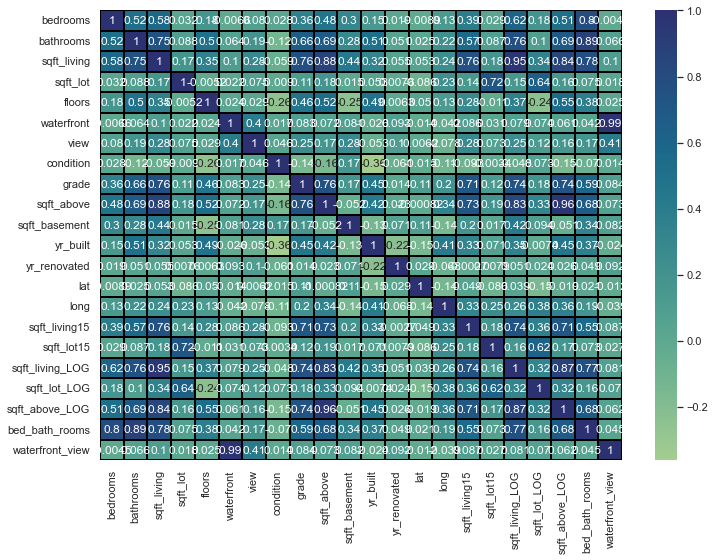

In [45]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(domy_int_normalized_numpy_norm.corr(),annot = domy_int_normalized_numpy_norm.corr(), cmap="crest", linewidths=2, linecolor='black')

In [46]:
domy_int_X_train, domy_int_X_rem, domy_int_y_train, domy_int_y_rem = train_test_split(domy_int, ceny, train_size=0.67, random_state=numer_indeksu)
domy_int_X_valid, domy_int_X_test, domy_int_y_valid, domy_int_y_test = train_test_split(domy_int_X_rem,domy_int_y_rem, train_size=0.5)

In [47]:
domy_int_normalized_X_train, domy_int_normalized_X_rem, domy_int_normalized_y_train, domy_int_normalized_y_rem = train_test_split(domy_int_normalized_numpy_norm, ceny, train_size=0.67, random_state=numer_indeksu)
domy_int_normalized_X_valid, domy_int_normalized_X_test, domy_int_normalized_y_valid, domy_int_normalized_y_test = train_test_split(domy_int_normalized_X_rem, domy_int_normalized_y_rem , train_size=0.5)

In [48]:
domy_int_normalized_X_train.shape, domy_int_normalized_X_valid.shape, domy_int_normalized_X_test.shape

((14480, 22), (3566, 22), (3567, 22))

    metoda spadku koordynatów

In [49]:
def get_wj(ro, lamb ,zj):
    if ro < -lamb/2:
        return (ro + lamb/2.)/zj
    elif ro > lamb/2:
        return (ro - lamb/2.)/zj
    else:
        return 0.

In [50]:
def lasso(lamb, iterations, data):
    z = sum(np.square(np.array(data))) #wcześniej miałem nieznormalizowane dane tutaj (przy liczeniu z)
    waga_init = np.random.rand(data.shape[1])
    for i in range(iterations):
        for indx, kolumna in enumerate(data):
            ro = np.dot(data[kolumna], (ceny - np.dot(data, waga_init)))
            waga_init[indx] = get_wj(ro, lamb, z[indx])
    return waga_init

In [51]:
coefs_ = lasso(5e2, 500, domy_int_normalized_numpy_norm)
coefs_

array([ 14439550.03901213,   6500105.47599611, -16638587.90395679,
        -4059022.57564137,   3042733.65597287,   3608830.06471146,
         9768511.86140251,  34014200.76872128,   6878957.35152727,
        -5137265.02742841,    691055.17414565, -36902960.88493847,
       -11926363.3843039 ,  -2693081.61432125,   8591575.33999923,
        25741689.0432959 ,  -3525300.90510097,  11548511.25551555,
         2538714.85205948,  24270324.11944963,  43689131.33642372,
         6111110.09858197])

In [52]:
def get_top_k_columns_names_lasso(dane_do_kolumn ,dane, k, lamb, iters):
    domy_int_columns = dane_do_kolumn.keys()
    coefs_ = lasso(lamb, iters, dane)
    feature_importances_sorted_idx = np.argsort(coefs_)[::-1]
    top_k_features = feature_importances_sorted_idx[:k]
    return domy_int_columns[top_k_features], coefs_

In [53]:
top_5_lasso = get_top_k_columns_names_lasso(domy_int, domy_int_normalized_numpy_norm, 5, 100000000, 100)
top_5_lasso

(Index(['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade'], dtype='object'),
 array([1018956.88588693, 3907228.70838759, 7358250.85390473,
              0.        ,  237451.29517684,       0.        ,
              0.        ,       0.        , 3683925.19020011,
        5367176.86691005,       0.        ,       0.        ,
              0.        ,       0.        ,       0.        ,
        4903052.85459655,       0.        , 1029666.72572775,
              0.        ,  928469.99595092, 3156676.71796418,
              0.        ]))

In [54]:
top_5_lasso = get_top_k_columns_names_lasso(domy_int, domy_int_normalized_numpy_norm, 5, 150000000, 1000)
top_5_lasso

(Index(['sqft_living', 'sqft_above', 'sqft_living15', 'grade', 'bathrooms'], dtype='object'),
 array([      0.        ,  385396.42006325, 3914424.3928368 ,
              0.        ,       0.        ,       0.        ,
              0.        ,       0.        ,  391507.81130242,
        2340683.20707768,       0.        ,       0.        ,
              0.        ,       0.        ,       0.        ,
        2008326.89232909,       0.        ,       0.        ,
              0.        ,       0.        ,       0.        ,
              0.        ]))

In [55]:
top_5_lasso = get_top_k_columns_names_lasso(domy_int, domy_int_normalized_numpy_norm, 5, 10000000, 1000)
top_5_lasso

(Index(['sqft_living', 'sqft_above', 'bathrooms', 'bed_bath_rooms',
        'sqft_living15'],
       dtype='object'),
 array([ 4472059.3652696 ,  7284898.96151116, 11141481.26719261,
               0.        ,  5648776.42106571,  1283268.19282627,
         6216880.26132276,  3519899.01926224,  5027707.30642732,
         7614470.15466142,  4582865.63103527,   121132.25398408,
          389079.94851296,   504845.54261486, -1414020.28194689,
         6446844.54836316,        0.        ,  2863428.79159153,
         3185299.79024574,  3885264.12733381,  7117005.36393805,
         2635934.0044549 ]))

In [56]:
top_5_lasso = get_top_k_columns_names_lasso(domy_int, domy_int_normalized_numpy_norm, 5, 10000000, 2000)
top_5_lasso

(Index(['sqft_living', 'sqft_above', 'bed_bath_rooms', 'bathrooms', 'grade'], dtype='object'),
 array([ 4565638.28259431,  7329672.92116233, 10534709.63676201,
               0.        ,  4762081.11218906,  2480559.9219476 ,
         6194163.51946561,  3382971.44644462,  6198098.40116363,
         8846467.10752759,  4912372.75248401,  1529779.93083232,
          524815.14716488,   997320.55795889,  -481033.8183976 ,
         5314304.1824501 ,        0.        ,  2036429.58230397,
         2201255.29485847,  3603616.19477689,  7640254.02852293,
         2117385.9333571 ]))

In [57]:
top_5_lasso = get_top_k_columns_names_lasso(domy_int, domy_int_normalized_numpy_norm, 5, 150000000, 500)
top_5_lasso

(Index(['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade'], dtype='object'),
 array([      0.        ,  825955.92953945, 4475778.77996612,
              0.        ,       0.        ,       0.        ,
              0.        ,       0.        ,  572625.14950386,
        1993186.16149818,       0.        ,       0.        ,
              0.        ,       0.        ,       0.        ,
        1383455.55665013,       0.        ,       0.        ,
              0.        ,       0.        ,       0.        ,
              0.        ]))

In [58]:
top_10_lasso = get_top_k_columns_names_lasso(domy_int, domy_int_normalized_numpy_norm, 10, 105000000, 500)
top_10_lasso

(Index(['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade',
        'bed_bath_rooms', 'sqft_living_LOG', 'sqft_above_LOG', 'bedrooms',
        'sqft_lot_LOG'],
       dtype='object'),
 array([ 785733.79490732, 3645247.05830349, 6919839.92184538,
              0.        ,       0.        ,       0.        ,
              0.        ,       0.        , 3140277.71436363,
        4948027.67986151,       0.        ,       0.        ,
              0.        ,       0.        ,       0.        ,
        4751152.20439608,       0.        ,  993126.46801141,
          57641.54489645,  905210.23413373, 2980564.80552451,
              0.        ]))

In [59]:
top_15_lasso = get_top_k_columns_names_lasso(domy_int, domy_int_normalized_numpy_norm, 15, 90000000, 500)
top_15_lasso

(Index(['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade',
        'bed_bath_rooms', 'sqft_living_LOG', 'sqft_above_LOG', 'bedrooms',
        'floors', 'sqft_lot_LOG', 'lat', 'yr_built', 'condition', 'waterfront'],
       dtype='object'),
 array([1339111.95924166, 4173237.11402458, 7706878.57433495,
              0.        ,  608449.46903082,       0.        ,
              0.        ,   36067.88653823, 3887197.2042288 ,
        5721611.13853362,       0.        ,   70348.16768193,
              0.        ,  167567.64969163, -230618.78453421,
        5339903.98836084,       0.        , 1466656.60054834,
         567628.43003235, 1368720.86308687, 3737844.4586065 ,
              0.        ]))

    porównanie z sklearn

In [60]:
from sklearn import linear_model  # using scikit-learn
# 5e2
model_all = linear_model.Lasso(alpha=5e2, normalize=False) # set parameters
model_all.fit(domy_int, ceny) # learn weights
print(model_all.coef_)

[-1.06965759e+04  4.51156337e+04  4.58788880e+02  3.02949153e-01
 -0.00000000e+00  0.00000000e+00  4.43944992e+04  3.69481076e+04
  1.02998939e+05 -1.04238732e+02 -1.19473225e+02 -2.38785981e+03
  2.85463563e+01  5.09549576e+05 -2.70535382e+04  4.36030781e+01
 -1.95016098e-01 -4.62308734e+05 -2.80977212e+04 -0.00000000e+00
 -0.00000000e+00  1.49505306e+05]


C:\Users\krukd\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383231015497839.94, tolerance: 291291676192.12976
  model = cd_fast.enet_coordinate_descent(


In [61]:
from sklearn import linear_model  # using scikit-learn
# 5e2
model_all = linear_model.Lasso(alpha=5e2, normalize=True) # set parameters
model_all.fit(domy_int, ceny) # learn weights
print(model_all.coef_)

[ 0.00000000e+00  0.00000000e+00  1.36561015e+02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.52729151e+04  0.00000000e+00
  5.80002598e+04  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.78367573e+05 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [62]:
from sklearn import linear_model  # using scikit-learn
# 5e2
model_all = linear_model.Lasso(alpha=100, normalize=False) # set parameters
model_all.fit(domy_int_normalized_numpy_norm, ceny) # learn weights
sklearn_lasso_coefs = model_all.coef_
sklearn_lasso_coefs_feature_importances_sorted_idx = np.argsort(sklearn_lasso_coefs)[::-1]
sklearn_lasso_coefs_best_5_features = sklearn_lasso_coefs_feature_importances_sorted_idx[:5]
top_5_lasso_sklearn = domy_int.keys()[sklearn_lasso_coefs_best_5_features]
top_5_lasso_sklearn, sklearn_lasso_coefs

(Index(['sqft_living', 'view', 'waterfront', 'yr_renovated', 'waterfront_view'], dtype='object'),
 array([      -0.        ,        0.        , 72997676.09228402,
              -0.        ,        0.        ,  4537663.38631467,
         8727643.57577934,        0.        ,        0.        ,
               0.        ,        0.        ,       -0.        ,
         1625414.867185  ,        0.        ,       -0.        ,
               0.        ,       -0.        ,        0.        ,
              -0.        ,        0.        ,        0.        ,
         1147119.85773569]))

In [63]:
top_5_lasso

(Index(['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade'], dtype='object'),
 array([      0.        ,  825955.92953945, 4475778.77996612,
              0.        ,       0.        ,       0.        ,
              0.        ,       0.        ,  572625.14950386,
        1993186.16149818,       0.        ,       0.        ,
              0.        ,       0.        ,       0.        ,
        1383455.55665013,       0.        ,       0.        ,
              0.        ,       0.        ,       0.        ,
              0.        ]))

## Zadanie 7
Zaimplementuj metodę spadku gradientów dla regularyzacji grzebietowej. Zabezpiecz się przed zbyt dużym współczynnikiem uczenia, badając zbieżność w każdym kroku i w razie potrzeby zmniejszając współczynnik uczenia $\sqrt{2}$ razy.

    regularyzacja grzbietowa dokonuje normalizacji L2:
    * minimalizuje wariancje modelu
    * poprawia właściwości predykcji
    * działa lepiej, gdy większość zmiennych jest użyteczna

    największa różnica pomiędzy regularycją grzbietową, a lasso jest taka, że lasso jest w stanie wyzerować cechy, a regularyzcja grzbietowa zbliży się do zera, ale go nie osiągnie

    regularyzacja grzbietowa metodą gradient descent

In [64]:
def feature_derivative(errors, data):
    #print(errors,data)
    #derivative = 2*sum(np.square(errors)*data)
    #derivative = 2*sum(errors*data)
    #derivative = sum(errors*data)
    derivative = np.dot(errors,data)
    #derivative = 2*np.dot(errors, data)
    return(derivative)

In [65]:
### wzór z zeszytu

from math import sqrt
def regression_gradient_descent_with_L2(data, output, initial_weights, step_size, tolerance, lamb, max_iters):
    
    converged = False 
    weights = np.array(initial_weights) # miej pewność, że wagi są typu numpy array
    n = len(weights)
    last_gradient_magnitude = 9e9
    iters = 0
    while not converged:
        iters += 1
        # obliczyć prognozy na podstawie feature_matrix i wag za pomocą funkcji predict_output()
        predict_output = np.dot(data, weights)
        # wylicz błąd predykcji jako: predict_output - output
        pred_error = predict_output - output
        gradient_sum_squares = 0 # inicjuj sumę pierwiastków gradientów
        # chociaż nie osiągnęliśmy jeszcze tolerancji, zaktualizuj wagę każdej funkcji
        for j_w in range(len(weights)): # zapętlenie każdej wagi
            # Przypomnij sobie, że feature_matrix [:, i] to kolumna cech powiązana z wagami[i]
            # obliczyć pochodną dla wagi[i]:
            
            #print(data.columns[j_w])
            d = feature_derivative(pred_error, data[data.columns[j_w]])
            #print("sadada",d)
            # dodaj kwadrat wartości pochodnej do sumy kwadratów gradientów (ocena zbieżności) 
            gradient_sum_squares += d ** 2
            
            # odejmij wielkość kroku pomnożoną przez pochodną od bieżącej wagi
            weights[j_w] = weights[j_w] * (1 - step_size * lamb/n) - (step_size * (1/n) * d)
        #print(weights)
            #print(d)
        # oblicz pierwiastek kwadratowy z sumy gradientów kwadratów, aby uzyskać wielkość gradientu:
        gradient_magnitude = sqrt(gradient_sum_squares)
        #print(gradient_magnitude)
        if gradient_magnitude > last_gradient_magnitude:
            step_size /= sqrt(2)
            #print(step_size)
        last_gradient_gadnitude = gradient_magnitude

        if gradient_magnitude < tolerance:
            converged = True
            print('Did ',iters, ' iters')
        
        if iters == max_iters:
            break
    return(weights)#, predict_output)

In [66]:
init_weights = np.random.rand(domy_int.shape[1])
#trzeba dodać 1 na lewo?
init_weights

array([0.69523792, 0.8130775 , 0.21591657, 0.04560077, 0.99307213,
       0.58316941, 0.18503845, 0.00561344, 0.68137664, 0.46519932,
       0.13934132, 0.22928166, 0.08613428, 0.21934608, 0.6012508 ,
       0.40549561, 0.38112004, 0.81630891, 0.66404768, 0.197058  ,
       0.52477074, 0.82149124])

In [67]:
step_size = 0.7
tolerance = 2.5e1
lamb = 0.5
max_iters = 500
w = regression_gradient_descent_with_L2(domy_int_normalized_numpy_norm, ceny, init_weights, step_size, tolerance, lamb, max_iters)
predict_output = np.dot(domy_int_normalized_numpy_norm, w)
pred_error = predict_output - ceny
MSE = sum(np.square(pred_error))/len(pred_error)
pred_error, MSE, w

(0        111466.781733
 1        104906.324952
 2        144298.819930
 3        -48903.964155
 4        -75954.837597
              ...      
 21608    110444.686582
 21609    145945.981910
 21610    -92828.466265
 21611     53578.727832
 21612    -16045.889208
 Name: price, Length: 21613, dtype: float64,
 69169682342.84253,
 array([ 2372119.46920619,  6665948.26917104, 12234168.82668056,
          828511.82611867,  4668513.51321393,  3615919.12854557,
         8167566.38922029,  2434820.84335061,  6462722.26230785,
        12165609.07084251,  7246501.77260636,  1348293.75301349,
         2919004.94296825,  1547467.15328462, -1465285.81798803,
         9111040.3078013 ,    90461.49121629,  2545298.3279395 ,
         1554044.93653657,  2611071.21581668,  8191007.88883616,
         3556496.00856469]))

In [68]:
pd.Series(predict_output), ceny

(0        333366.781733
 1        642906.324952
 2        324298.819930
 3        555096.035845
 4        434045.162403
              ...      
 21608    470444.686582
 21609    545945.981910
 21610    309272.533735
 21611    453578.727832
 21612    308954.110792
 Length: 21613, dtype: float64,
 0        221900.0
 1        538000.0
 2        180000.0
 3        604000.0
 4        510000.0
            ...   
 21608    360000.0
 21609    400000.0
 21610    402101.0
 21611    400000.0
 21612    325000.0
 Name: price, Length: 21613, dtype: float64)

    regularyzacja grzbietowa z użyciem pseudoinwersji

In [71]:
def create_ones_matrix(X):
    # Miejsce na kod
    macierz_regularyzacji = np.eye(np.shape(X)[1])
    #macierz_regularyzacji[0,0] = 0
    #print(np.shape(macierz_regularyzacji))
    return macierz_regularyzacji

### pseudoinwersja z karą
def L2_model_inv_lamb(dane, ceny ,lamb):
    ones = create_ones_matrix(dane)
    A = np.linalg.inv(np.dot(dane.T,dane) + lamb * ones)
    #print(A)
    B = np.dot(dane.T, ceny)
    #B = B.reshape(B.shape[0], 1)
    A.shape, B.shape
    return np.dot(A, B)


## Zadanie 8
Dla 5 wybranych w Zadaniu 5 cech dokonaj doboru współczynnika regularyzacji dla metody grzbietowej. 

*Skorzystaj z własnej implementacji regresji z Zadania 7. Zacznij od wysokiego współczynnika uczenia.*

    walidacja krzyżowa

In [72]:
from random import randrange
from random import seed

def cross_validation_split(dataset, ceny, folds):
    #
    seed(324244)
    #
    dataset_split = []
    dataset_split_ceny = []
    df_copy = dataset
    df_ceny = ceny
    fold_size = int(df_copy.shape[0] / folds)
    # for loop to save each fold
    for i in range(folds):
        fold = []
        fold_ceny = []
        # while loop to add elements to the folds
        while len(fold) < fold_size:
            # select a random element
            r = randrange(df_copy.shape[0])
            # determine the index of this element 
            index = df_copy.index[r]
            # save the randomly selected line

            fold.append(df_copy.loc[index].values.tolist())

            fold_ceny.append(df_ceny.loc[index].tolist())
            # delete the randomly selected line from
            # dataframe not to select again
            df_ceny = df_ceny.drop(index)
            df_copy = df_copy.drop(index)
        # save the fold    
        dataset_split.append(np.asarray(fold))
        #dataset_split.append(pd.DataFrame(fold, columns = domy_int_normalized_numpy_norm.columns))
        dataset_split_ceny.append(np.asarray(fold_ceny))
        
    return dataset_split, dataset_split_ceny

In [73]:
folds_k = 10
cross_v_domy_int_normalized_numpy_norm, cross_ceny_normalized_numpy_norm = cross_validation_split(domy_int_normalized_numpy_norm, ceny, folds_k)
cross_v_domy_int, cross_ceny = cross_validation_split(domy_int, ceny, folds_k)

In [74]:
best_5

['waterfront_view',
 'bed_bath_rooms',
 'sqft_above_LOG',
 'sqft_lot_LOG',
 'sqft_living_LOG']

In [139]:
step_size = 0.999
tolerance = 2.5e1
max_iters = 50
lamb_list = [round(0.5 * i ** 15, 6) for i in range(1,4)]
lamb_list

[0.5, 16384.0, 7174453.5]

In [76]:
def get_MSE(X, Y, w_):
    predict_output = np.dot(X, w_)
    pred_error = predict_output - Y
    MSE = sum(np.square(pred_error))/len(pred_error)
    return MSE

In [140]:
lamb = 0.5
w = regression_gradient_descent_with_L2(domy_int_normalized_X_train, domy_int_normalized_y_train, init_weights, step_size, tolerance, lamb, max_iters)
get_MSE(domy_int_normalized_X_train, domy_int_normalized_y_train, w), get_MSE(domy_int_normalized_X_rem, domy_int_normalized_y_rem, w)

(74143880761.27913, 74295338601.51581)

In [129]:
def lambda_tester(cross_v_domy_int_normalized_numpy_norm, cross_ceny_normalized_numpy_norm, lamb_list, best_5, step_size, max_iters, best_5_ = False, log_scale = False):
    error_list_lamb_train = []
    error_list_lamb_test = []
    for lamb in lamb_list:
        if best_5_:
            initial_weights = np.random.rand(5)
        else:
            initial_weights = np.random.rand(22)
        lamb_er_train = []
        lamb_er_test = []
        for t_n in range(folds_k-1):
            try:
                del folded
                del folded_ceny
            except NameError:
                pass
            for i in range(folds_k):
                #print((i + t_n) % 9)
                if i == 0:
                    test = cross_v_domy_int_normalized_numpy_norm[(i + t_n) % 9]
                    test_ceny = cross_ceny_normalized_numpy_norm[(i + t_n) % 9]
                    test = pd.DataFrame(test, columns = domy_int_normalized_numpy_norm.columns)
                    test_ceny = pd.Series(test_ceny)
                else:
                    try:
                        _ = folded.shape
                        folded = np.concatenate((folded,cross_v_domy_int_normalized_numpy_norm[(i + t_n) % 9]), axis= 0)
                        folded_ceny = np.concatenate((folded_ceny,cross_ceny_normalized_numpy_norm[(i + t_n) % 9]), axis= 0)
                    except NameError:
                        folded = cross_v_domy_int_normalized_numpy_norm[(i + t_n) % 9]
                        folded_ceny = cross_ceny_normalized_numpy_norm[(i + t_n) % 9]

            train = folded
            train_ceny = folded_ceny
            train = pd.DataFrame(train, columns = domy_int_normalized_numpy_norm.columns)
            train_ceny = pd.Series(folded_ceny)
            
            if best_5_:
                test = test[best_5]
                train = train[best_5]
            else:
                pass
            #print(train, test)

            w = regression_gradient_descent_with_L2(train, train_ceny, initial_weights, step_size, tolerance, lamb, max_iters)
            lamb_er_train.append(get_MSE(train, train_ceny, w))
            lamb_er_test.append(get_MSE(test, test_ceny, w))

        
        print('poszegolny bledy treningowe:', lamb_er_train)
        print('poszegolny bledy testowe:', lamb_er_test)

        error_list_lamb_train.append(sum(lamb_er_train) / len(lamb_er_train))
        error_list_lamb_test.append(sum(lamb_er_test) / len(lamb_er_test))

    print('uśrednione błędy treningowe:', error_list_lamb_train)
    print('uśrednione błędy testowe:', error_list_lamb_test)
    print('\n')
    min_lamb_value = lamb_list[error_list_lamb_train.index(min(error_list_lamb_train))]
    plt.plot(lamb_list, error_list_lamb_train, label='train')
    plt.plot(lamb_list, error_list_lamb_test, label='test')
    plt.legend()
    plt.xlabel('Lambda value')
    if log_scale:
        plt.yscale('log',base=10)
        plt.ylabel('MSE [LOG]')
    else:
        plt.ylabel('MSE') 
    
    plt.show()

poszegolny bledy treningowe: [100980823878.05165, 100980823878.05219, 100980823878.05208, 100980823878.05225, 100980823878.05226, 100980823878.05193, 100980823878.05151, 100980823878.05138, 100980823878.05165]
poszegolny bledy testowe: [86424637779.63528, 96046105199.79872, 130989228396.94806, 107565741185.30276, 117221317903.42908, 91823014972.6891, 95710997548.77795, 88203846444.40306, 94842525471.4798]
poszegolny bledy treningowe: [1.7526406600781885e+88, 1.752640660078199e+88, 1.7526406600782086e+88, 1.7526406600781995e+88, 1.7526406600782e+88, 1.7526406600782012e+88, 1.752640660078198e+88, 1.752640660078188e+88, 1.7526406600781836e+88]
poszegolny bledy testowe: [1.745819608142643e+88, 1.743406229214845e+88, 1.7563038321026975e+88, 1.7483851727083122e+88, 1.7563620828116552e+88, 1.7526058513818988e+88, 1.7699885172457865e+88, 1.744775654098232e+88, 1.7561189929977302e+88]
poszegolny bledy treningowe: [7.664358872950215e+259, 7.66435887295019e+259, 7.664358872950185e+259, 7.66435887

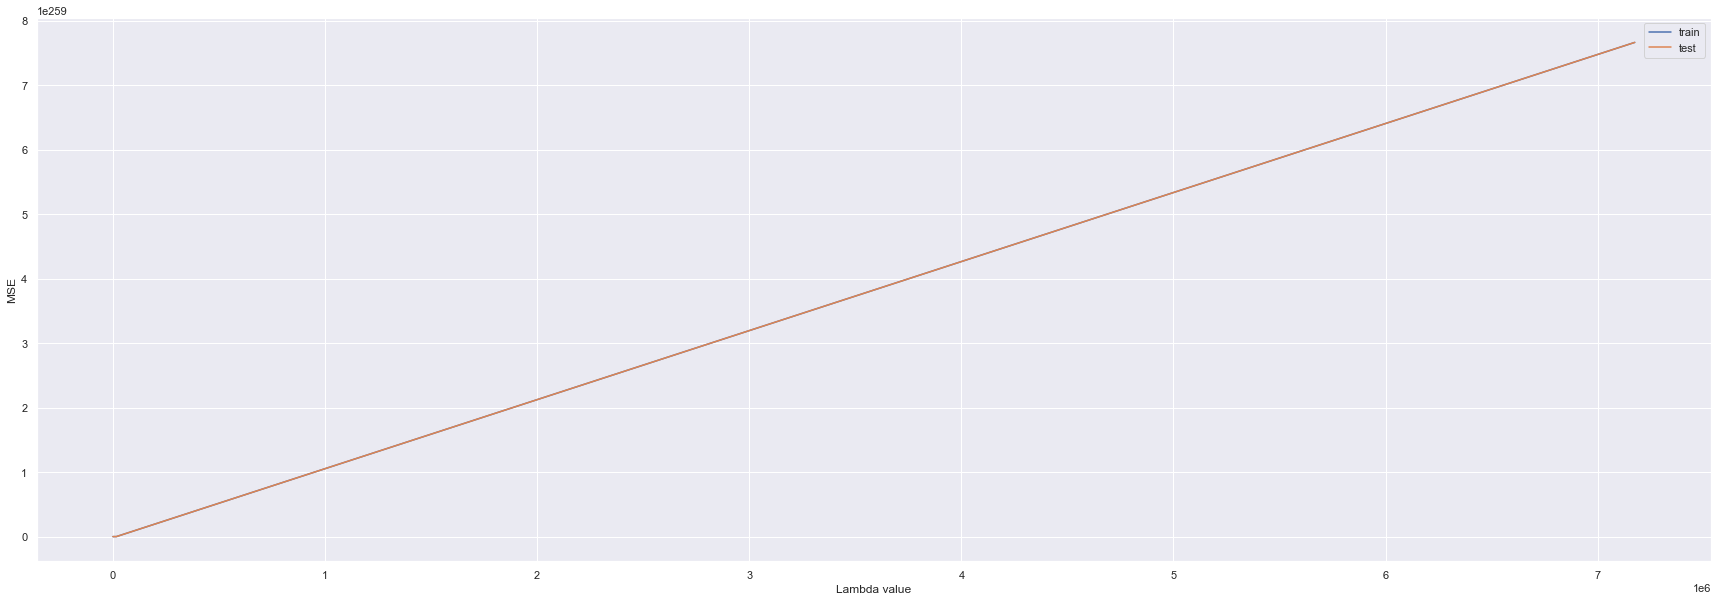

In [131]:
lambda_tester(cross_v_domy_int_normalized_numpy_norm, cross_ceny_normalized_numpy_norm, lamb_list, best_5, 0.7, 50, True)

poszegolny bledy treningowe: [88644553691.45927, 88644553691.45909, 88644553691.45909, 88644553691.45943, 88644553691.4591, 88644553691.45926, 88644553691.4598, 88644553691.46, 88644553691.45996]
poszegolny bledy testowe: [76789128713.58635, 84859659367.4266, 115068519963.8907, 91958800298.03304, 105141915109.30498, 79839631537.88414, 86983339687.7703, 74087270018.68216, 83072718526.55922]
poszegolny bledy treningowe: [4.239699308208541e+31, 4.239699308208557e+31, 4.2396993082085625e+31, 4.239699308208571e+31, 4.239699308208558e+31, 4.2396993082085715e+31, 4.239699308208576e+31, 4.239699308208557e+31, 4.239699308208555e+31]
poszegolny bledy testowe: [4.198231808199166e+31, 4.215854833882095e+31, 4.247701410417529e+31, 4.2452054100429015e+31, 4.2656949045738435e+31, 4.236602424482362e+31, 4.2768704235883415e+31, 4.224877330078854e+31, 4.246255228611886e+31]
poszegolny bledy treningowe: [5.321985482161787e+52, 5.321985482161805e+52, 5.321985482161818e+52, 5.321985482161815e+52, 5.3219854

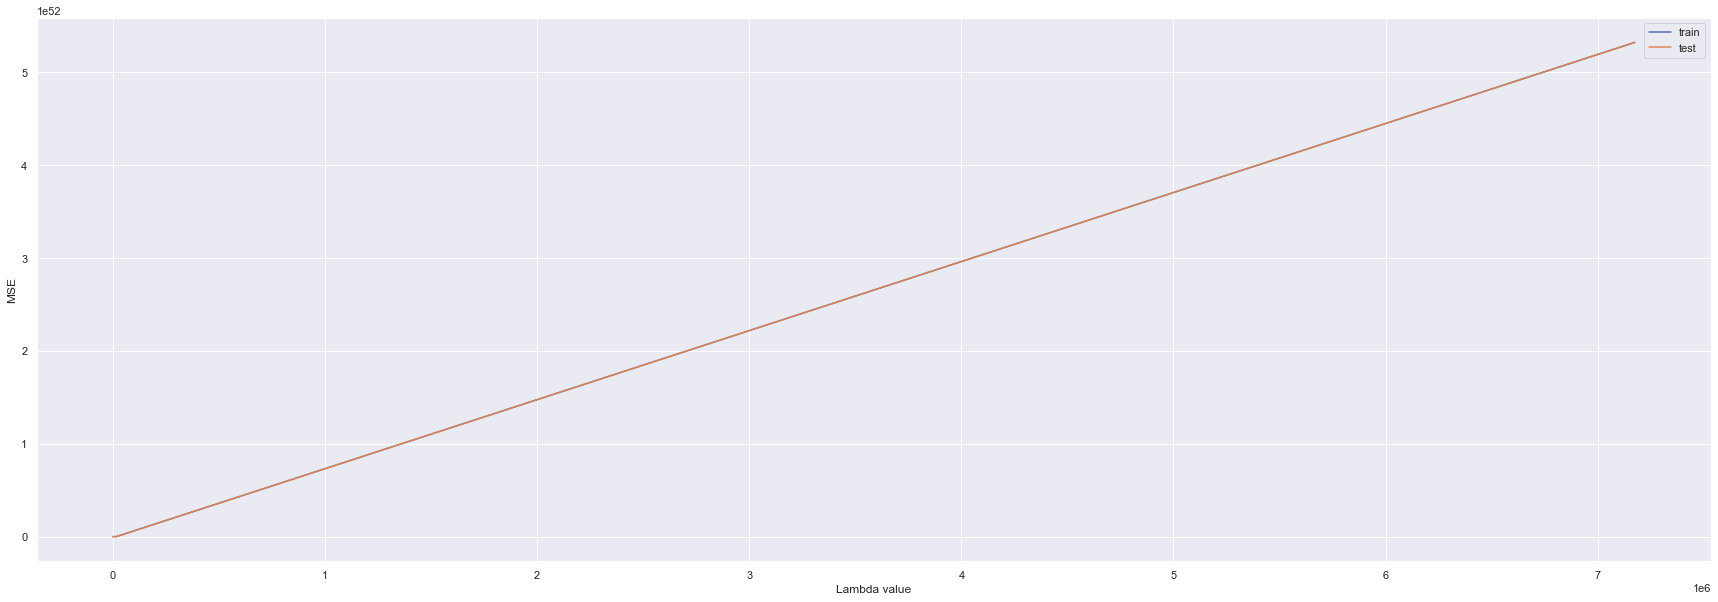

In [130]:
lambda_tester(cross_v_domy_int_normalized_numpy_norm, cross_ceny_normalized_numpy_norm, lamb_list, best_5, 0.7, 5, False)

## Zadanie 9
Wytrenuj 5 modeli:
1. Wykorzystujący wszystkie cechy dane w zbiorze.
2. Wykorzystujący wszystkie cechy dane w zbiorze + 5 zaproponowanych.
3. Wykorzystujący 5 cech wybranych regresją krokową w tył.
4. Wykorzystujące tylko cechy wybrane dzięki metodzie Lasso.
5. Wykorzystujące cechy wybrane w metodzie Lasso i poddane regularyzacji grzbietowej dla wybranego współczynnika regularyzacji.

#### trenujemy różne modele każdy model 1 pkt

In [126]:
domy_int_normalized_X_train[top_5_lasso[0]]

,sqft_living,sqft_above,sqft_living15,bathrooms,grade
15493,0.007210,0.004521,0.004240,0.008311,0.006147
10381,0.005295,0.004383,0.005470,0.005289,0.006147
7561,0.004188,0.003589,0.006021,0.006800,0.006147
17567,0.005684,0.006558,0.004920,0.006800,0.006147
9767,0.004517,0.005212,0.004726,0.005289,0.006147
...,...,...,...,...,...
600,0.004996,0.005764,0.007024,0.005289,0.007025
16065,0.007360,0.008491,0.005600,0.009067,0.007025
5669,0.008197,0.009457,0.008869,0.007556,0.008781
20102,0.008945,0.010320,0.009678,0.007556,0.007903


In [117]:
def models_tester(lamb = 0.5, one_4 = True, L2 = True):
    models_errors = {
        'Model' : [],
        'train_error' : [],
        'test_error' : []
    }

    if one_4:
        #1
        postawowe_cechy_tylko = list(set(postawowe_cechy) & set(domy_int.keys()))
        coefs, X_p, train_pred, test_pred, train_error, test_error = tester(domy_int_X_train, domy_int_y_train, domy_int_X_rem, domy_int_y_rem, postawowe_cechy_tylko)
        models_errors['Model'] += ["basic"]
        models_errors['train_error'] += [train_error]
        models_errors['test_error'] += [test_error]
        len(domy_int_X_train.keys())

        #2
        coefs, X_p, train_pred, test_pred, train_error, test_error = tester(domy_int_X_train, domy_int_y_train, domy_int_X_rem, domy_int_y_rem, domy_int_X_train.keys())
        models_errors['Model'] += ["basic+extra features"]
        models_errors['train_error'] += [train_error]
        models_errors['test_error'] += [test_error]
        
        #3
        coefs, X_p, train_pred, test_pred, train_error, test_error = tester(domy_int_X_train, domy_int_y_train, domy_int_X_rem, domy_int_y_rem, best_5)
        models_errors['Model'] += ["best 5"]
        models_errors['train_error'] += [train_error]
        models_errors['test_error'] += [test_error]
        
        #4
        coefs, X_p, train_pred, test_pred, train_error, test_error = tester(domy_int_X_train, domy_int_y_train, domy_int_X_rem, domy_int_y_rem, top_15_lasso[0])
        models_errors['Model'] += ["my lasso best 15"]
        models_errors['train_error'] += [train_error]
        models_errors['test_error'] += [test_error]

        #4
        coefs, X_p, train_pred, test_pred, train_error, test_error = tester(domy_int_X_train, domy_int_y_train, domy_int_X_rem, domy_int_y_rem, top_10_lasso[0])
        models_errors['Model'] += ["my lasso best 10"]
        models_errors['train_error'] += [train_error]
        models_errors['test_error'] += [test_error]

        #4
        coefs, X_p, train_pred, test_pred, train_error, test_error = tester(domy_int_X_train, domy_int_y_train, domy_int_X_rem, domy_int_y_rem, top_5_lasso[0])
        models_errors['Model'] += ["my lasso best 5"]
        models_errors['train_error'] += [train_error]
        models_errors['test_error'] += [test_error]
        
        #4 mod lasso_sklearn
        coefs, X_p, train_pred, test_pred, train_error, test_error = tester(domy_int_X_train, domy_int_y_train, domy_int_X_rem, domy_int_y_rem, top_5_lasso_sklearn)
        models_errors['Model'] += ["sklearn lasso best 5"]
        models_errors['train_error'] += [train_error]
        models_errors['test_error'] += [test_error]

    if L2:
        #5
        init_weights = np.random.rand(domy_int[top_5_lasso[0]].shape[1])
        step_size = 1.1
        tolerance = 2.5e1
        max_iters = 1000
        w = regression_gradient_descent_with_L2(domy_int_normalized_X_train[top_5_lasso[0]], domy_int_normalized_y_train, init_weights, step_size, tolerance, lamb, max_iters)
        train_error, test_error = get_MSE(domy_int_normalized_X_train[top_5_lasso[0]], domy_int_normalized_y_train, w), get_MSE(domy_int_normalized_X_rem[top_5_lasso[0]], domy_int_normalized_y_rem, w)
        models_errors['Model'] += ["my lasso best 5+L2 gradient"]
        models_errors['train_error'] += [train_error]
        models_errors['test_error'] += [test_error]

        # #5 mod lasso_sklearn
        # init_weights = np.random.rand(domy_int[top_5_lasso_sklearn].shape[1])
        # step_size = 1.1
        # tolerance = 2.5e1
        # max_iters = 1000
        # w = regression_gradient_descent_with_L2(domy_int_normalized_X_train[top_5_lasso_sklearn], domy_int_normalized_y_train, init_weights, step_size, tolerance, lamb, max_iters)
        # train_error, test_error = get_MSE(domy_int_normalized_X_train[top_5_lasso_sklearn], domy_int_normalized_y_train, w), get_MSE(domy_int_normalized_X_rem[top_5_lasso_sklearn], domy_int_normalized_y_rem, w)
        # models_errors['Model'] += ["sklearn lasso best 5+L2 gradient"]
        # models_errors['train_error'] += [train_error]
        # models_errors['test_error'] += [test_error]

        #5 mod inv 
        w = L2_model_inv_lamb(domy_int_normalized_X_train[top_5_lasso[0]], domy_int_normalized_y_train, lamb)
        train_error, test_error = get_MSE(domy_int_normalized_X_train[top_5_lasso[0]], domy_int_normalized_y_train, w), get_MSE(domy_int_normalized_X_rem[top_5_lasso[0]], domy_int_normalized_y_rem, w)
        models_errors['Model'] += ["my lasso best 5+L2 INV"]
        models_errors['train_error'] += [train_error]
        models_errors['test_error'] += [test_error]

        w = L2_model_inv_lamb(domy_int_normalized_X_train[top_10_lasso[0]], domy_int_normalized_y_train, lamb)
        train_error, test_error = get_MSE(domy_int_normalized_X_train[top_10_lasso[0]], domy_int_normalized_y_train, w), get_MSE(domy_int_normalized_X_rem[top_10_lasso[0]], domy_int_normalized_y_rem, w)
        models_errors['Model'] += ["my lasso best 10+L2 INV"]
        models_errors['train_error'] += [train_error]
        models_errors['test_error'] += [test_error]

        w = L2_model_inv_lamb(domy_int_normalized_X_train[top_15_lasso[0]], domy_int_normalized_y_train, lamb)
        train_error, test_error = get_MSE(domy_int_normalized_X_train[top_15_lasso[0]], domy_int_normalized_y_train, w), get_MSE(domy_int_normalized_X_rem[top_15_lasso[0]], domy_int_normalized_y_rem, w)
        models_errors['Model'] += ["my lasso best 15+L2 INV"]
        models_errors['train_error'] += [train_error]
        models_errors['test_error'] += [test_error]

        # #5 mod inv sklearn
        # w = L2_model_inv_lamb(domy_int_normalized_X_train[top_5_lasso_sklearn], domy_int_normalized_y_train, lamb)
        # train_error, test_error = get_MSE(domy_int_normalized_X_train[top_5_lasso_sklearn], domy_int_normalized_y_train, w), get_MSE(domy_int_normalized_X_rem[top_5_lasso_sklearn], domy_int_normalized_y_rem, w)
        # models_errors['Model'] += ["sklearn lasso best 5+L2 INV"]
        # models_errors['train_error'] += [train_error]
        # models_errors['test_error'] += [test_error]




    plt.rcParams['figure.figsize'] = [30, 10]
    n=len(models_errors['Model'])
    models_errors = pd.DataFrame(models_errors)
    r = np.arange(n)
    width = 0.25
    plt.bar(r, height=models_errors['train_error'], width=width, label='train_error')
    plt.bar(r + width, height=models_errors['test_error'], width=width, label='test_error')
    plt.xticks(r + width/2,models_errors['Model'])
    plt.title('Model errors')
    plt.ylabel('MSE')
    #plt.yscale('log')
    plt.legend()
    plt.show()

In [118]:
lamb_models = 0.3

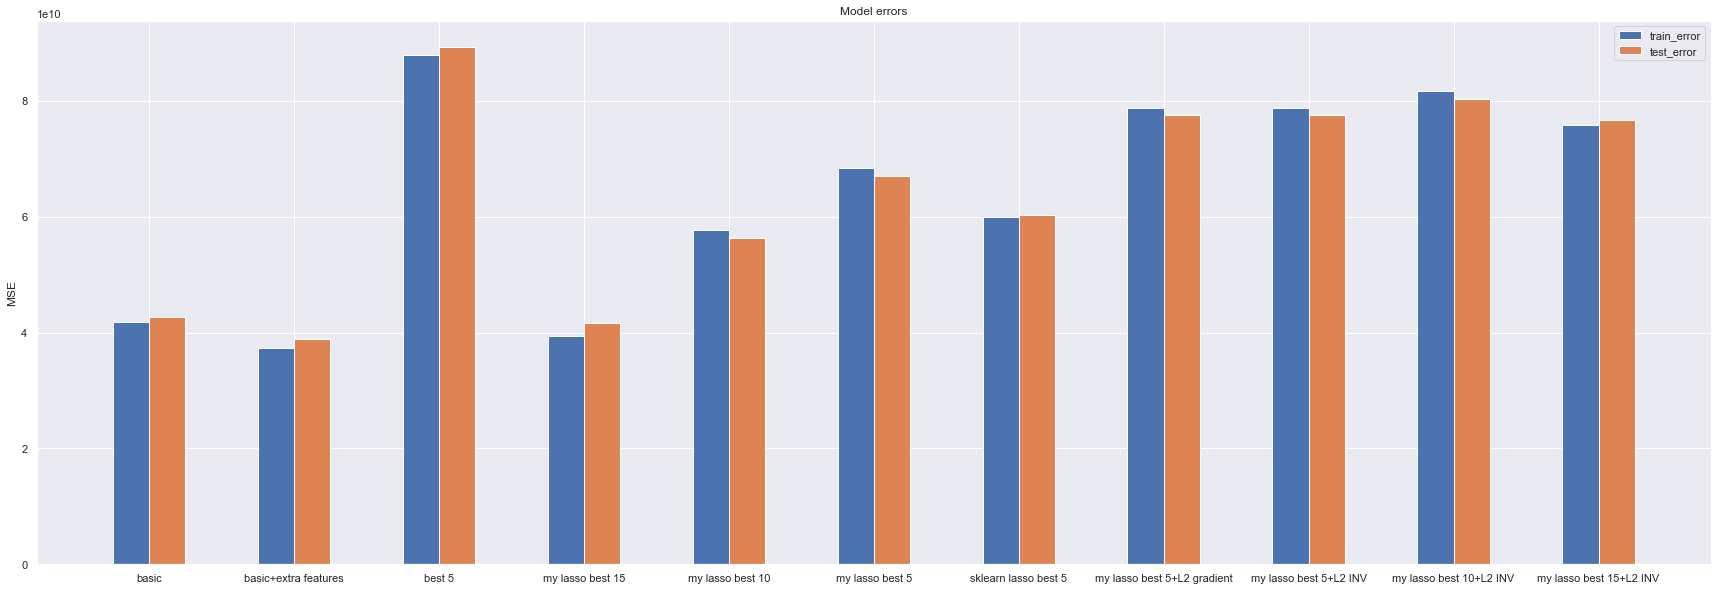

In [119]:
models_tester(lamb_models)

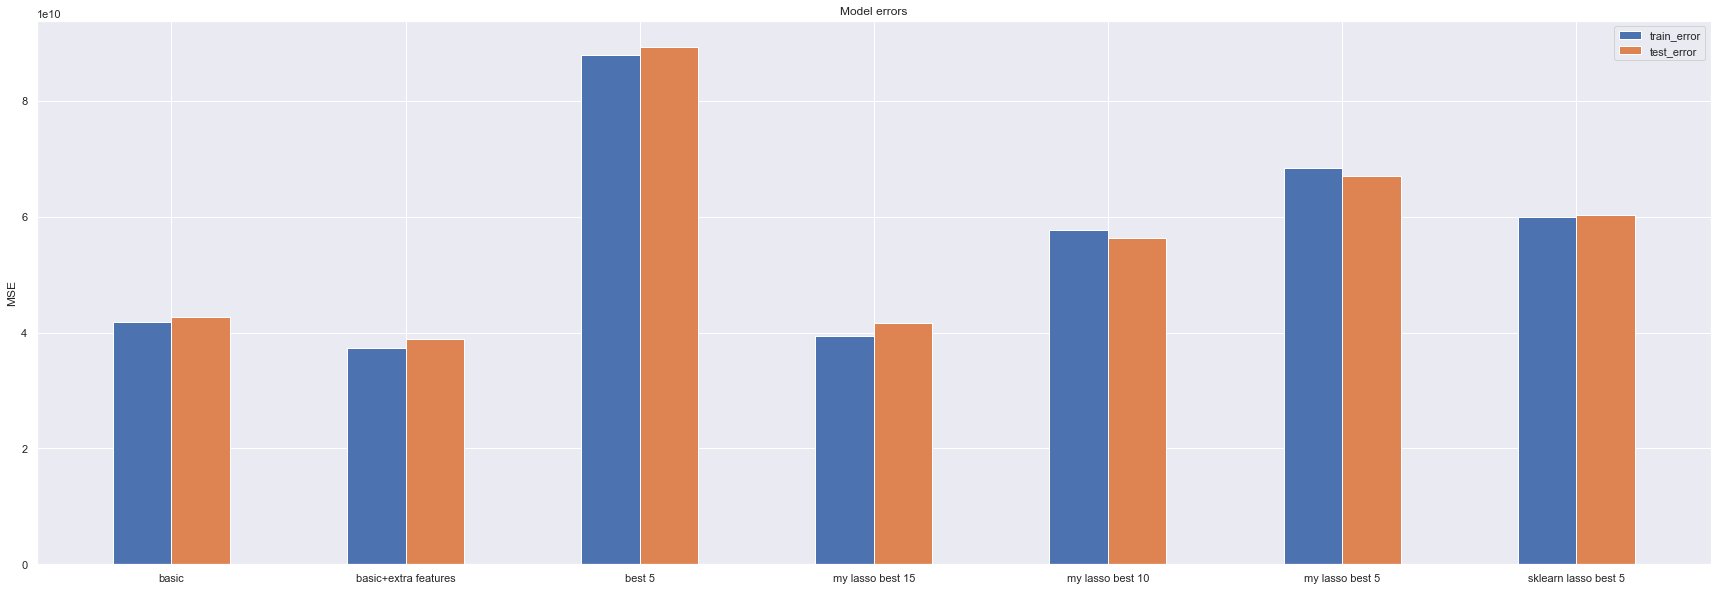

In [120]:
models_tester(lamb_models, True, False)

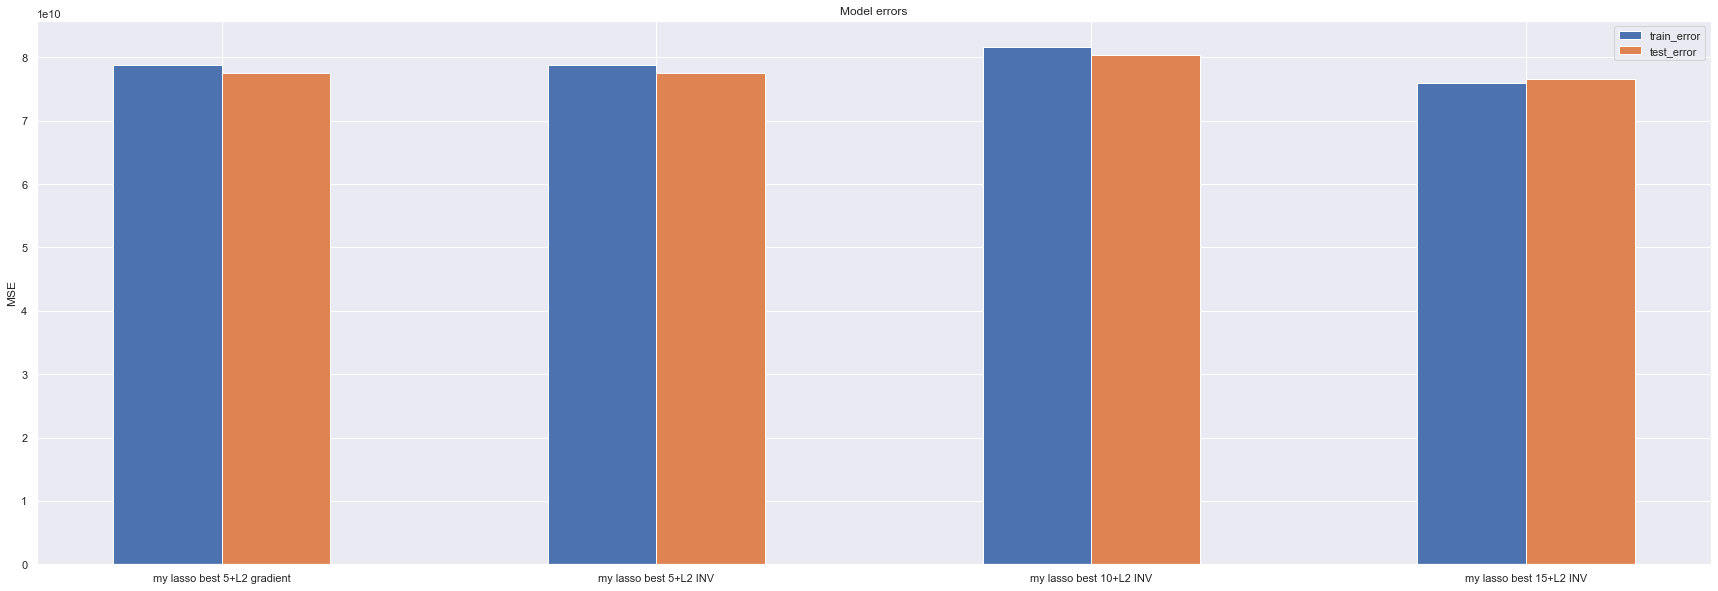

In [121]:
models_tester(lamb_models, False)

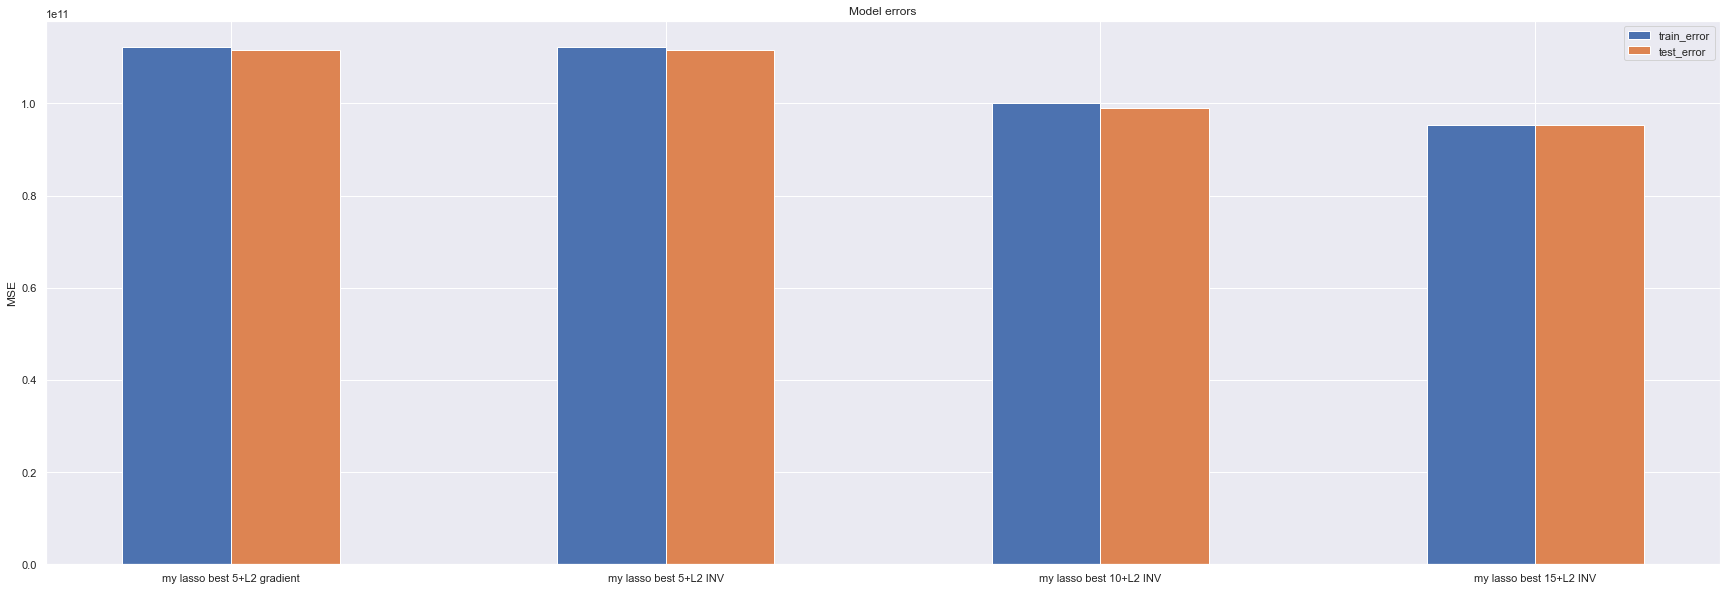

In [122]:
models_tester(lamb_models * 5, False)

## Zadanie 10
Dokonaj oceny i porównania modeli z Zadania 9. Wybierz najlepszy model.

    Wybór najlepszego modelu:
    Patrząc na same wartości błędów wybrałbym model z największą ilością cech czyli podstawowe cechy + 5 dodanych przeze mnie. 
    Ten model ma jednak błąd testowy większy od treningowego dodatkowo wiedząc o korelacjach zachodzących pomiędzy zmiennymi i chcąc skupić się na ulepszaniu modelu w rzewistym zastosowaniu zdecydowałbym się na my lasso best 10.

    Co ciekawe najsłabszy okazał się model wybierany przez regresję krokową w tył. Myślę, że powodem tego było wykonywanie regresji bez podziału na zbiór treningowy i testowy. 

    Wnioski
    Ogólnie rzeczą nad którą skupiałem się w tym projekcie najbardziej było dobieranie cech, co przysporzyło pewnych problemów w trakcie realizacji zadań - czasami byłem po prostu za bardzo zafiksowany na tym punkcie.
    Początkowo badałem dane za pomocą statystyki. Ten etap przebiegał w moim przypadku dość długo, ze względu na małą wiedzę na temat statystyki i tego czego mogę za jej pomocą dokonać. Wiem już, że mogę z jej pomocą dobrać - wyeliminować/dodać jakieś cechy, lecz sama analiza danych nie musi się do tego sprowadzać. Mogę po prostu dowiedzieć się co dane zawierają i jak mogę je później wykorzystać.
    Kolejny etap to wyznaczanie liniowych zależności pomiędzy cechami opisującymi, a cechą opisywaną. Liniowe zależności można przedstawić pod postacią wag/współczynników otrzymanych np. z pomocą pseudoinwersji, owe zależności wskazują, jak poszczególne zmienne wpływają na Y - jak zmiana w poszególnej cesze wpływa na zmianę zmiennej opisywanej. 
    Kolejne etapy słuzą wyborowi najlepszych cech. Jest to potrzebne, chociażby po to,  aby wyeliminować zmienne opisujące będące ze sobą skorelowane, jak pokazała analiza statystyczna. 
    Każdy etap miał jakiś swój cel, miał przybliżyć mnie i mój model do lepszego przewidywania rzeczywistości. Dobieranie cech można wykonać samodzielnie lub przy pomococy jakiegoś algorytmu. Można też próbować to łączyć, myśle że nie ma tutaj złych rozwiązań, acz dla tego przypadku najbardziej optymalny okazał się algorytm lasso.